# Benjamin Lavoie (benjaminlavoie02@gmail.com)

# CapStone project: Gaming Score Forecasting Model

# Last update: March 15th, 2024 (version 2.1)

# Notebook 1: EDA

## Introduction:

My capstone project is about video games sales and ratings prediction.

It has 3 main datapoints:
    1. Past game sales
    2. Past game ratings
    3. Game features, like the number of players, the genre, and more.
 

# Table of Contents

**[1. Part 1 - Inspecting and choosing datasets](#heading--1)**

  * [1.1 - Dataset VG_Sales_All2](#heading--1-1)

  * [1.2 - Dataset Video_Games](#heading--1-2)
  
  * [1.3 - Dataset metacritic_games_master](#heading--1-3)
    
  * [1.4 - Dataset Tagged-Data-Final](#heading--1-4)
  
  * [1.5 - Dataset Cleaned Data 2](#heading--1-5)
  
  * [1.6 - Dataset opencritic_rankings_feb_2023](#heading--1-6)
  
  * [1.7 - Dataset vgsales](#heading--1-7)
  
  * [1.8 - Dataset all_video_games(cleaned)](#heading--1-8)
  
  * [1.9 - Dataset Raw Data](#heading--1-9)
  
  * [1.10 - Dataset zmetascore-video-games-1986-2023](#heading--1-10)
  

**[2. Part 2 - Cleaning and joining datasets](#heading--2)**

  * [2.1 - Merging the 4 main datasets](#heading--2-1)

  * [2.2 - About the target column](#heading--2-2)

  * [2.3 - A clean dataframe](#heading--2-3)

  * [2.4 - Visualization of distribution](#heading--2-4)

  * [2.5 - Visualization of target column in each value of each category](#heading--2-5)


## [Next Steps](#heading--3)


<div id="heading--1"/>
<br>

# Part 1 - Inspecting and choosing datasets 

<br>

I will start looking into the different datasets and making sure my main dataset is cleaned and
can be used properly.

In [93]:

# Necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import nltk
import statsmodels.api as sm
import glob
import os

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# To plot
from scipy import stats
from scipy.stats import norm 

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To process text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To do dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


# To see more columns at once, I'll change the display.max_columns number
pd.set_option('display.max_columns', 50)

In [94]:
# importing datasets, part 1

path = ''
all_files = glob.glob(os.path.join("../DataSets/*.csv"))

all_files

['../DataSets/Video_Games.csv',
 '../DataSets/metacritic_games_master.csv',
 '../DataSets/zmetascore-video-games-1986-2023.csv',
 '../DataSets/Tagged-Data-Final.csv',
 '../DataSets/Cleaned Data 2.csv',
 '../DataSets/opencritic_rankings_feb_2023.csv',
 '../DataSets/vgsales.csv',
 '../DataSets/all_video_games(cleaned).csv',
 '../DataSets/Raw Data.csv',
 '../DataSets/VG_Sales_All2.csv']

In [95]:
# importing datasets, part 2, and putting all the datasets into dataframes

df2 = pd.read_csv(all_files[0], index_col=None, header=0)
df3 = pd.read_csv(all_files[1], index_col=None, header=0)
df10 = pd.read_csv(all_files[2], index_col=None, header=0)
df4 = pd.read_csv(all_files[3], index_col=None, header=0)
df5 = pd.read_csv(all_files[4], index_col=None, header=0)
df6 = pd.read_csv(all_files[5], index_col=None, header=0)
df7 = pd.read_csv(all_files[6], index_col=None, header=0)
df8 = pd.read_csv(all_files[7], index_col=None, header=0)
df9 = pd.read_csv(all_files[8], index_col=None, header=0)
df1 = pd.read_csv(all_files[9], index_col=None, header=0)

<div id="heading--1-1"/>
<br>

# 1.1 - Dataset VG_Sales_All2
<br>

In [96]:
# I will check the first dataset.

display(df1.head())
display(df1.sample(20))

Rank                              Name Platform   Publisher  \
0     30                        Wii Sports      Wii  Nintendo     
1     53               Mario Kart 8 Deluxe       NS  Nintendo     
2  22606                   Team Fortress 2       PC     Valve     
3     81  Counter-Strike: Global Offensive       PC     Valve     
4     75     Animal Crossing: New Horizons       NS  Nintendo     

             Developer  NA_Sales  PAL_Sales  JP_Sales  Other_Sales  \
0       Nintendo EAD       41.36      29.02      3.77         8.51   
1       Nintendo EPD        5.05       4.98      2.11         0.91   
2  Valve Corporation         NaN       0.00       NaN         0.00   
3  Valve Corporation         NaN        NaN       NaN          NaN   
4           Nintendo         NaN        NaN       NaN          NaN   

   Global_Sales    Year       Genre Platform_Brand Platform_Type  
0         82.65  2006.0      Sports       Nintendo   HomeConsole  
1         60.58  2017.0      Racing       Nintendo   HomeConsole  
2         50.10  2008.0     Shooter             PC            PC  
3         46.00  2012.0     Shooter             PC            PC  
4         43.38  2020.0  Simulation       Nintendo   HomeConsole

Rank                                               Name Platform  \
6845    8372                                     SoulCalibur VI     XOne   
29581  48405                  Stonekeep: Bones of the Ancestors      Wii   
12657  14611                      Ar tonelico: Melody of Elemia      PS2   
39962  60918                                   Roller Champions       PC   
26445  41385                                   NHLPA Hockey '93     SNES   
11968  13641                                     Constructor HD      PS4   
32110  46980                                   Ski Park Manager       PC   
2053    3003                                      Slime Rancher       PC   
7978    9655                                        PGA Tour 96       PS   
45629  62468         The Expanse: A Telltale Series - Archangel      PS5   
37048  32428                                             Falcon       PC   
12407  14191                         Riviera: The Promised Land      GBA   
5546    6958                                Madden NFL Football      3DS   
4681    5911                                 Super Robot Wars Z      PS2   
26362  59649                                Need for Speed Heat       PC   
39324  34352                         Godzilla: Kaijuu Daikessen     SNES   
8918   10509                          Kamen Rider: Battride War      PS3   
22391  26702  Bishoujo Senshi Sailor Moon Super S: Shuyaku!!...     SNES   
19842  21455                 WarTech: Senko no Ronde (JP sales)     X360   
41429  62650                      The Lord of the Rings: Gollum       NS   

                    Publisher                 Developer  NA_Sales  PAL_Sales  \
6845     Bandai Namco Games              Project Soul        0.26       0.01   
29581             Interplay                   Unknown         NaN        NaN   
12657  Nippon Ichi Software                      Gust         NaN        NaN   
39962               Ubisoft                   Ubisoft         NaN        NaN   
26445       Electronic Arts    Park Place Productions         NaN        NaN   
11968           Deep Silver                  System 3        0.09        NaN   
32110              Microids                   Lankhor         NaN        NaN   
2053            Monomi Park               Monomi Park         NaN        NaN   
7978              EA Sports                 EA Sports        0.13       0.09   
45629               Unknown            Telltale Games         NaN        NaN   
37048     Spectrum Holobyte                    Sphere         NaN        NaN   
12407                 Atlus                     Sting        0.07       0.03   
5546              EA Sports                EA Tiburon        0.37       0.01   
4681                Unknown                 Banpresto         NaN        NaN   
26362       Electronic Arts               Ghost Games         NaN        NaN   
39324                  TOHO               Alfa System         NaN        NaN   
8918     Namco Bandai Games                  Eighting         NaN        NaN   
22391                Bandai             Angel Studios         NaN        NaN   
19842               Ubisoft                     G.Rev         NaN        NaN   
41429               Unknown    Daedalic Entertainment         NaN        NaN   

       JP_Sales  Other_Sales  Global_Sales    Year         Genre  \
6845        NaN         0.03          0.30  2018.0      Fighting   
29581       NaN          NaN          0.00  2012.0          Misc   
12657      0.10          NaN          0.10  2007.0  Role-Playing   
39962       NaN          NaN          0.00  2020.0        Sports   
26445       NaN          NaN          0.00  1992.0        Sports   
11968       NaN         0.02          0.11  2017.0      Strategy   
32110       NaN          NaN          0.00  2002.0    Simulation   
2053        NaN          NaN          1.22  2017.0    Simulation   
7978        NaN         0.02          0.24  1995.0        Sports   
45629       NaN          NaN          0.00     NaN

In [97]:
# quick checking of best selling games.

df1.sort_values('Global_Sales', ascending = False).head(40)

Rank                                          Name Platform  \
0      30                                    Wii Sports      Wii   
1      53                           Mario Kart 8 Deluxe       NS   
2   22606                               Team Fortress 2       PC   
3      81              Counter-Strike: Global Offensive       PC   
4      75                 Animal Crossing: New Horizons       NS   
5      87                 PLAYERUNKNOWN'S BATTLEGROUNDS       PC   
6      80                             Super Mario Bros.      NES   
7      86                                Mario Kart Wii      Wii   
8      97                                     Minecraft       PC   
9      98                             Wii Sports Resort      Wii   
10    103                    Super Smash Bros. Ultimate       NS   
11    106       The Legend of Zelda: Breath of the Wild       NS   
12    105            Pokemon Red / Green / Blue Version       GB   
13     93                                        Tetris       GB   
14    112                         New Super Mario Bros.       DS   
15    128                                      Wii Play      Wii   
16    113                     New Super Mario Bros. Wii      Wii   
17    127                                     Duck Hunt      NES   
18    134                           Super Mario Odyssey       NS   
19    136                        Pokemon Sword / Shield       NS   
20    147                            Kinect Adventures!     X360   
21    149                                    Nintendogs       DS   
22   7501                                 Left 4 Dead 2       PC   
23    151                                 Mario Kart DS       DS   
24    153                      Pokemon Scarlet / Violet       NS   
25    155                 Pokemon Gold / Silver Version       GB   
26    156                                      Terraria       PC   
27    158                           Marvel's Spider-Man      PS4   
28    159                                       Wii Fit      Wii   
29    197                            Horizon: Zero Dawn      PS4   
30    168                                  Wii Fit Plus      Wii   
31    169                             God of War (2018)      PS4   
32    216                 Grand Theft Auto: San Andreas      PS2   
33    173                             Super Mario World     SNES   
34    194                             Super Mario Party       NS   
35    176                            Grand Theft Auto V      PS3   
36    195     The Legend of Zelda: Tears of the Kingdom       NS   
37    199  Brain Age: Train Your Brain in Minutes a Day       DS   
38    334                                    Diablo III       PC   
39    196                            Grand Theft Auto V      PS4   

                           Publisher                            Developer  \
0                         Nintendo                         Nintendo EAD     
1                         Nintendo                         Nintendo EPD     
2                            Valve                    Valve Corporation     
3                            Valve                    Valve Corporation     
4                         Nintendo                             Nintendo     
5                 PUBG Corporation                     PUBG Corporation     
6                         Nintendo                         Nintendo EAD     
7                         Nintendo                         Nintendo EAD     
8                           Mojang                            Mojang AB     
9                         Nintendo                         Nintendo EAD     
10                        Nintendo                   Bandai Namco Games     
11                        Nintendo                         Nintendo EPD     
12                        Nintendo                           Game Freak     
13                        Nintendo                Bullet Proof Software     
14                        Nintendo                         Ni

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


This dataset will be my main dataset. It has a lot of info regarding sales and games. I will keep the following columns:

### Name: df1, video_games_sales:
 - name
 - genre (maybe)
 - platform
 - publisher
 - only the Global_Sales column (in millions)
 
<br>

I will drop the other columns as I don't think they will be useful for my model, either because I don't have neough data or because some info will be more complete in other datasets.

In [100]:
df1.drop(['Year', 'Rank', 'NA_Sales', 'PAL_Sales',
          'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

In [101]:
# checking the df

df1

Name Platform   Publisher  \
0                            Wii Sports      Wii  Nintendo     
1                   Mario Kart 8 Deluxe       NS  Nintendo     
2                       Team Fortress 2       PC     Valve     
3      Counter-Strike: Global Offensive       PC     Valve     
4         Animal Crossing: New Horizons       NS  Nintendo     
...                                 ...      ...         ...   
48002                     Bubble Safari       PC     Zynga     
48003                       CastleVille       PC     Zynga     
48004              FarmVille (Facebook)       PC     Zynga     
48005          FrontierVille (Facebook)       PC     Zynga     
48006             Mafia Wars (Facebook)       PC     Zynga     

                 Developer  Global_Sales       Genre Platform_Brand  \
0           Nintendo EAD           82.65      Sports       Nintendo   
1           Nintendo EPD           60.58      Racing       Nintendo   
2      Valve Corporation           50.10     Shooter             PC   
3      Valve Corporation           46.00     Shooter             PC   
4               Nintendo           43.38  Simulation       Nintendo   
...                    ...           ...         ...            ...   
48002              Zynga            0.00     Shooter             PC   
48003              Zynga            0.00  Simulation             PC   
48004              Zynga            0.00  Simulation             PC   
48005              Zynga            0.00  Simulation             PC   
48006              Zynga            0.00  Simulation             PC   

      Platform_Type  
0       HomeConsole  
1       HomeConsole  
2                PC  
3                PC  
4       HomeConsole  
...             ...  
48002            PC  
48003            PC  
48004            PC  
48005            PC  
48006            PC  

[48007 rows x 8 columns]

In [102]:
# last df check

df1.head(20)

Name Platform           Publisher  \
0                                Wii Sports      Wii          Nintendo     
1                       Mario Kart 8 Deluxe       NS          Nintendo     
2                           Team Fortress 2       PC             Valve     
3          Counter-Strike: Global Offensive       PC             Valve     
4             Animal Crossing: New Horizons       NS          Nintendo     
5             PLAYERUNKNOWN'S BATTLEGROUNDS       PC  PUBG Corporation     
6                         Super Mario Bros.      NES          Nintendo     
7                            Mario Kart Wii      Wii          Nintendo     
8                                 Minecraft       PC            Mojang     
9                         Wii Sports Resort      Wii          Nintendo     
10               Super Smash Bros. Ultimate       NS          Nintendo     
11  The Legend of Zelda: Breath of the Wild       NS          Nintendo     
12       Pokemon Red / Green / Blue Version       GB          Nintendo     
13                                   Tetris       GB          Nintendo     
14                    New Super Mario Bros.       DS          Nintendo     
15                                 Wii Play      Wii          Nintendo     
16                New Super Mario Bros. Wii      Wii          Nintendo     
17                                Duck Hunt      NES          Nintendo     
18                      Super Mario Odyssey       NS          Nintendo     
19                   Pokemon Sword / Shield       NS          Nintendo     

                  Developer  Global_Sales             Genre Platform_Brand  \
0            Nintendo EAD           82.65            Sports       Nintendo   
1            Nintendo EPD           60.58            Racing       Nintendo   
2       Valve Corporation           50.10           Shooter             PC   
3       Valve Corporation           46.00           Shooter             PC   
4                Nintendo           43.38        Simulation       Nintendo   
5        PUBG Corporation           42.00           Shooter             PC   
6            Nintendo EAD           40.24          Platform       Nintendo   
7            Nintendo EAD           35.98            Racing       Nintendo   
8               Mojang AB           33.14              Misc             PC   
9            Nintendo EAD           32.90            Sports       Nintendo   
10     Bandai Namco Games           32.00          Fighting       Nintendo   
11           Nintendo EPD           31.61  Action-Adventure       Nintendo   
12             Game Freak           31.37      Role-Playing       Nintendo   
13  Bullet Proof Software           30.26            Puzzle       Nintendo   
14           Nintendo EAD           29.85          Platform       Nintendo   
15           Nintendo EAD           28.92              Misc       Nintendo   
16           Nintendo EAD           28.51          Platform       Nintendo   
17          Nintendo R&D1           28.31           Shooter       Nintendo   
18           Nintendo EPD           27.65          Platform       Nintendo   
19             Game Freak           26.02      Role-Playing       Nintendo   

   Platform_Type  
0    HomeConsole  
1    HomeConsole  
2             PC  
3             PC  
4    HomeConsole  
5             PC  
6    HomeConsole  
7    HomeConsole  
8             PC  
9    HomeConsole  
10   HomeConsole  
11   HomeConsole  
12      Handheld  
13      Handheld  
14      Handheld  
15   HomeConsole  
16   HomeConsole  
17   HomeConsole  
18   HomeConsole  
19   HomeConsole

<div id="heading--1-2"/>

# 1.2 - Dataset Video_Games
<br>

In [103]:
# checking the second df/dataset

display(df2.head())
display(df2.sample(20))

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

Name Platform  \
15315                                   Mind over Matter       DS   
7944                                  Mathews Bowhunting      Wii   
11514                                  Sports Collection       DS   
13818   J.League Pro Soccer Club o Tsukurou! 8 Euro Plus      PSP   
11276              Destroy All Humans! Path of the Furon      PS3   
10338                                       DJ Max Fever      PSP   
11809                                            Gladius       GC   
2158                            World Championship Poker      PS2   
5692                                Rugby World Cup 2011      PS3   
3929                             Silent Hill 4: The Room      PS2   
12391                  Game Center CX: 3-Choume no Arino      3DS   
1586                                          Watch Dogs     X360   
12835                                      Rocket League       PC   
2383                                       Sleeping Dogs     X360   
14757  Yahari Game Demo Ore no Seishun Love-Kome wa M...      PSV   
10098  Daito Giken Koushiki Pachi-Slot Simulator: Hih...      PS2   
4278                                     Missile Command       PS   
15901                Brave Story: Boku no Kioku to Negai       DS   
14281                  Gaia Saver Hero Saidai no Sakusen     SNES   
5041                                             Hangman     2600   

       Year_of_Release         Genre                     Publisher  NA_Sales  \
15315           2010.0        Puzzle                     505 Games      0.02   
7944            2010.0        Sports                     Zoo Games      0.18   
11514           2010.0        Sports                       Ubisoft      0.06   
13818           2013.0        Sports                          Sega      0.00   
11276           2009.0        Action                           THQ      0.00   
10338           2009.0          Misc                    PM Studios      0.09   
11809           2003.0      Strategy                    Activision      0.06   
2158            2004.0          Misc                       Play It      0.80   
5692            2011.0        Sports                     505 Games      0.00   
3929            2004.0        Action  Konami Digital Entertainment      0.25   
12391           2014.0        Action            Namco Bandai Games      0.00   
1586            2014.0        Action                       Ubisoft      0.72   
12835           2016.0        Sports                     505 Games      0.01   
2383            2012.0        Action                  Square Enix       0.38   
14757           2016.0     Adventure                           5pb      0.00   
10098           2006.0          Misc                         Daito      0.00   
4278            1999.0       Shooter                         Atari      0.25   
15901           2006.0  Role-Playing            Namco Bandai Games      0.00   
14281           1994.0  Role-Playing                     Banpresto      0.00   
5041               NaN        Puzzle                         Atari      0.35   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
15315      0.00      0.00         0.00          0.02           NaN   
7944       0.00      0.00         0.01          0.19           NaN   
11514      0.01      0.00         0.01          0.08           NaN   
13818      0.00      0.04         0.00          0.04           NaN   
11276      0.08      0.00         0.01          0.08           NaN   
10338      0.00      0.00         0.01          0.11          77.0   
11809      0.01      0.00         0.00          0.07          82.0   
2158       0.03      0.00         0.13          0.95          60.0   
5692       0.24      0.00         0.07          0.32          50.0   
3929       0.19      0.00         0.06          0.51          76.0   
12391      0.00      0.06         0.00          0.06           NaN   
1586       0.41      0.01         0.11          1.25           NaN   
12835      

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### name: df2, videogames:

I would keep like to keep rating or developer, but there are too many missing data. I won't keep anything from this dataset.

<div id="heading--1-3"/>

# 1.3 - Dataset metacritic_games_master
<br>

In [105]:
# checking the 3rd df/dataset

display(df3.head())
display(df3.sample(20))

Unnamed: 0                                       title release_date  \
0         113                                      Pushmo   2011-12-08   
1         163       The Legend of Zelda: Majora's Mask 3D   2015-02-13   
2         279     The Legend of Zelda: Ocarina of Time 3D   2011-06-19   
3         380  The Legend of Zelda: A Link Between Worlds   2013-11-22   
4         417                                  Colors! 3D   2012-04-05   

                                               genre platforms  \
0      Miscellaneous, Puzzle, Action, Puzzle, Action       3DS   
1              Fantasy, Action Adventure, Open-World       3DS   
2  Miscellaneous, Fantasy, Fantasy, Compilation, ...       3DS   
3  Action RPG, Role-Playing, Action Adventure, Ge...       3DS   
4       Miscellaneous, General, General, Application       3DS   

             developer esrb_rating  \
0  Intelligent Systems           E   
1               GREZZO        E10+   
2               GREZZO        E10+   
3             Nintendo           E   
4    Collecting Smiles           E   

                                               ESRBs  metascore  userscore  \
0                                                NaN         90        8.3   
1                                                NaN         89        8.9   
2  Animated Blood Fantasy Violence Suggestive Themes         94        9.0   
3                                                NaN         91        9.0   
4                                                NaN         89        7.5   

   critic_reviews  user_reviews  num_players  
0              31         215.0     1 Player  
1              82         781.0     1 Player  
2              85        1780.0     1 Player  
3              81        1603.0     1 Player  
4              15          66.0  1-2 Players

Unnamed: 0                                title release_date  \
17513       15169            Divinity II: Ego Draconis   2010-01-06   
5434        11465             The Solitaire Conspiracy   2020-10-06   
13385        3069  Azure Striker Gunvolt: Striker Pack   2017-08-31   
12813        7656                       Dead Head Fred   2007-08-28   
7342         7930                          Chicken Run   2000-11-13   
14002        9244               Shovel Knight Showdown   2019-12-10   
19006       14962                        The Falconeer   2020-11-10   
1493        12284                      Jazz Jackrabbit   2003-01-03   
12683        1574          God of War: Ghost of Sparta   2010-11-02   
5554        11899                       Valhalla Hills   2015-12-02   
1271         1052                        Sonic Advance   2002-02-03   
8436        15079                       Crash 'N' Burn   2004-11-15   
9615        11848                   Sports Champions 2   2012-10-30   
16164       15895         Delta Force: Black Hawk Down   2005-07-26   
14377       13736           GetsuFumaDen: Undying Moon   2022-02-09   
2831         2254             One Finger Death Punch 2   2019-04-15   
7577         1926                     Final Fantasy XI   2004-03-23   
17622       16358                Front Mission Evolved   2010-09-28   
11451       11832                     RiftStar Raiders   2018-02-27   
16688        4100                         Saints Row 2   2008-10-14   

                                                   genre platforms  \
17513               Role-Playing, Action RPG, Action RPG      X360   
5434                    Miscellaneous, Board / Card Game        PC   
13385                         Miscellaneous, Compilation        NS   
12813         Action Adventure, Horror, Horror, Survival       PSP   
7342                                     Action, General        PS   
14002                             Action, Platformer, 2D        NS   
19006                         Simulation, Flight, Combat      XOne   
1493                              Action, Platformer, 2D       GBA   
12683         Action Adventure, Fantasy, Fantasy, Linear       PSP   
5554                                   Strategy, General        PC   
1271                              Action, Platformer, 2D       GBA   
8436                             Driving, Racing, Arcade       PS2   
9615                            Sports, General, General       PS3   
16164    Action, Shooter, First-Person, Tactical, Modern        XB   
14377                             Action, Platformer, 2D        NS   
2831                       Action, General, Fighting, 2D        PC   
7577   Role-Playing, Massively Multiplayer Online, Fa...       PS2   
17622  Action, Shooter, Shooter, Third-Person, Sci-Fi...      X360   
11451            Action, Shooter, Shoot-'Em-Up, Top-Down       PS4   
16688       Action Adventure, Modern, Modern, Open-World      X360   

                    developer esrb_rating  \
17513    Larian Studios Games           M   
5434             Mike Bithell         NaN   
13385            Inti Creates           T   
12813           Vicious Cycle           M   
7342              Blitz Games           E   
14002        Yacht Club Games        E10+   
19006              Tomas Sala           T   
1493               Game Titan           E   
12683           Ready at Dawn           M   
5554   Daedalic Entertainment         NaN   
1271               Sonic Team           E   
8436             Climax Group           T   
9615      SCEA, Zindagi Games        E10+   
16164            Climax Group           T   
14377                GuruGuru           M   
2831      Silver Dollar Games         NaN   
7577              Square Enix           T   
17622      Double Helix Games           T   
11451          Climax Studios        E10+   
16688           Volition Inc.           M   

                                                   ESRBs  metascore  \
17513                   Blo

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19315 non-null  int64  
 1   title           19315 non-null  object 
 2   release_date    19315 non-null  object 
 3   genre           19315 non-null  object 
 4   platforms       19314 non-null  object 
 5   developer       19296 non-null  object 
 6   esrb_rating     17200 non-null  object 
 7   ESRBs           7855 non-null   object 
 8   metascore       19315 non-null  int64  
 9   userscore       17951 non-null  float64
 10  critic_reviews  19315 non-null  int64  
 11  user_reviews    17951 non-null  float64
 12  num_players     19302 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [107]:
df3.describe()

Unnamed: 0     metascore     userscore  critic_reviews   user_reviews
count  19315.000000  19315.000000  17951.000000    19315.000000   17951.000000
mean    9657.852343     70.627958      6.979294       22.940305     204.717286
std     5576.757904     12.248037      1.353780       17.324113    1431.254477
min        0.000000     11.000000      0.300000        6.000000       4.000000
25%     4828.500000     64.000000      6.300000       10.000000      14.000000
50%     9658.000000     72.000000      7.300000       17.000000      34.000000
75%    14487.500000     79.000000      7.900000       30.000000     105.000000
max    19317.000000     99.000000      9.700000      127.000000  158410.000000

This dataset is the main dataset related to the target.
Since the target will be related to the metascore, this dataset will be my main dataset related to that.

I will keep those columns:

### name: df3, metacritic_games_master
 - release date
 - developer (some missing values, still useful)
 - esrb_rating (some missing values, still useful)
 - metascore
 - userscore
 - critic_reviews
 - user_reviews
 - num_players (some missing values, still useful)

In [108]:
# dropping the unnecessary columns

df3.drop(['Unnamed: 0', 'genre', 'ESRBs'], axis=1, inplace=True)

In [109]:
# Also, I'll change release_date column into datetime

df3['release_date'] = pd.to_datetime(df3['release_date'])

In [110]:
# last check of the df

df3

title release_date  \
0                                                 Pushmo   2011-12-08   
1                  The Legend of Zelda: Majora's Mask 3D   2015-02-13   
2                The Legend of Zelda: Ocarina of Time 3D   2011-06-19   
3             The Legend of Zelda: A Link Between Worlds   2013-11-22   
4                                             Colors! 3D   2012-04-05   
...                                                  ...          ...   
19310                              Necromunda: Hired Gun   2021-06-01   
19311  Grand Theft Auto: The Trilogy - The Definitive...   2021-11-11   
19312                                      Bright Memory   2020-11-10   
19313                                  Balan Wonderworld   2021-03-26   
19314                                         CrossfireX   2022-02-10   

      platforms                           developer esrb_rating  metascore  \
0           3DS                 Intelligent Systems           E         90   
1           3DS                              GREZZO        E10+         89   
2           3DS                              GREZZO        E10+         94   
3           3DS                            Nintendo           E         91   
4           3DS                   Collecting Smiles           E         89   
...         ...                                 ...         ...        ...   
19310        XS              Focus Home Interactive           M         56   
19311        XS  Rockstar Games, Grove Street Games           M         56   
19312        XS                FYQD Personal Studio         NaN         55   
19313        XS  Square Enix, Arzest, Balan Company        E10+         47   
19314        XS                           Smilegate           M         39   

       userscore  critic_reviews  user_reviews  \
0            8.3              31         215.0   
1            8.9              82         781.0   
2            9.0              85        1780.0   
3            9.0              81        1603.0   
4            7.5              15          66.0   
...          ...             ...           ...   
19310        5.3              11          10.0   
19311        0.7              11        1124.0   
19312        4.2              31          62.0   
19313        7.2              11         162.0   
19314        3.2              21         271.0   

                                    num_players  
0                                      1 Player  
1                                      1 Player  
2                                      1 Player  
3                                      1 Player  
4                                   1-2 Players  
...                                         ...  
19310                                  1 Player  
19311                                  1 Player  
19312                                  1 Player  
19313  No Online Multiplayer Online Multiplayer  
19314                                  1 Player  

[19315 rows x 10 columns]

<div id="heading--1-4"/>
<br>

# 1.4 - Dataset Tagged-Data-Final
<br>

In [111]:
# checking the 4th df/dataset

display(df4.head())
display(df4.sample(20))

Name  Year_of_Release         Genre   Publisher  \
0  .hack//Infection Part 1             2002  Role-Playing       Atari   
1   .hack//Mutation Part 2             2002  Role-Playing       Atari   
2   .hack//Outbreak Part 3             2002  Role-Playing       Atari   
3              [Prototype]             2009        Action  Activision   
4              [Prototype]             2009        Action  Activision   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0      0.49      0.38      0.26         0.13          1.27            75   
1      0.23      0.18      0.20         0.06          0.68            76   
2      0.14      0.11      0.17         0.04          0.46            70   
3      0.84      0.35      0.00         0.12          1.31            78   
4      0.65      0.40      0.00         0.19          1.24            79   

   Critic_Count  User_Score  User_Count              Developer Rating  \
0            35         8.5          60          CyberConnect2      T   
1            24         8.9          81          CyberConnect2      T   
2            23         8.7          19          CyberConnect2      T   
3            83         7.8         356  Radical Entertainment      M   
4            53         7.7         308  Radical Entertainment      M   

   Story Focus  Gameplay Focus  Series  
0            1               0       1  
1            1               0       1  
2            1               0       1  
3            0               1       1  
4            0               1       1

Name  Year_of_Release         Genre  \
5059                              SimAnimals             2009    Simulation   
4807  Rune Factory 3: A Fantasy Harvest Moon             2009  Role-Playing   
1877                          FIFA Soccer 09             2008        Sports   
4546                    Rayman 2: Revolution             2000      Platform   
2667           James Noir's Hollywood Crimes             2011     Adventure   
5609                      Tales of Phantasia             2003  Role-Playing   
5366                        Star Fox Command             2006       Shooter   
6043                             The Witcher             2007  Role-Playing   
1540                       Dungeon Siege III             2011  Role-Playing   
4260                Phantasy Star Portable 2             2009  Role-Playing   
6873          Zero Escape: Zero Time Dilemma             2016     Adventure   
4897                            Second Sight             2004     Adventure   
1312          Disgaea: Afternoon of Darkness             2006  Role-Playing   
1933                        Fighters Uncaged             2010      Fighting   
4105                          No More Heroes             2007        Action   
5053                       Silent Hunter III             2005    Simulation   
1992                 Final Fight: Streetwise             2006        Action   
396                 Batman: Return to Arkham             2016        Action   
4842                          Salt Lake 2002             2002        Sports   
974                                 Coraline             2009        Action   

                                   Publisher  NA_Sales  EU_Sales  JP_Sales  \
5059                         Electronic Arts      0.14      0.13      0.00   
4807                       Rising Star Games      0.26      0.03      0.10   
1877                         Electronic Arts      0.38      0.07      0.01   
4546                                 Ubisoft      0.15      0.11      0.00   
2667                                 Ubisoft      0.07      0.07      0.00   
5609                                Nintendo      0.08      0.03      0.17   
5366                                Nintendo      0.38      0.01      0.10   
6043                                   Atari      0.00      0.05      0.00   
1540                             Square Enix      0.21      0.12      0.01   
4260                                    Sega      0.08      0.11      0.62   
6873                             Aksys Games      0.05      0.00      0.02   
4897                             Codemasters      0.04      0.01      0.00   
1312                              Tecmo Koei      0.15      0.01      0.04   
1933                                 Ubisoft      0.31      0.23      0.00   
4105                       Rising Star Games      0.29      0.17      0.04   
5053                                 Ubisoft      0.00      0.07      0.00   
1992                                  Capcom      0.03      0.02      0.00   
396   Warner Bros. Interactive Entertainment      0.05      0.05      0.00   
4842                       Eidos Interactive      0.07      0.05      0.00   
974                              D3Publisher      0.05      0.00      0.00   

      Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
5059         0.03          0.31            58            13         2.1   
4807         0.02          0.40            77            10         8.6   
1877         1.82          2.28            82             8         6.9   
4546         0.04          0.30            90            16         8.2   
2667         0.01          0.15            60            22         6.6   
5609         0.01          0.29            76            29         8.1   
5366         0.04          0.53            76            56         7.3   
6043         0.01          0.06            81            50         8.8   
1540         0.03          0.37            72            55       

In [112]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      6894 non-null   int64  
 16  Gameplay Focus   6894 non-null   int64  
 17  Series        

In [113]:
df4.describe()

Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6894.000000  6894.000000  6894.000000  6894.000000   6894.00000   
mean       2007.482303     0.390920     0.234517     0.063867      0.08200   
std           4.236401     0.963231     0.684214     0.286461      0.26862   
min        1985.000000     0.000000     0.000000     0.000000      0.00000   
25%        2004.000000     0.060000     0.020000     0.000000      0.01000   
50%        2007.000000     0.150000     0.060000     0.000000      0.02000   
75%        2011.000000     0.390000     0.210000     0.010000      0.07000   
max        2016.000000    41.360000    28.960000     6.500000     10.57000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  \
count   6894.000000   6894.000000   6894.000000  6894.000000   6894.000000   
mean       0.771487     70.258486     28.842472     7.184378    174.392370   
std        1.954780     13.861082     19.194572     1.439806    584.872155   
min        0.010000     13.000000      3.000000     0.500000      4.000000   
25%        0.110000     62.000000     14.000000     6.500000     11.000000   
50%        0.290000     72.000000     24.000000     7.500000     27.000000   
75%        0.750000     80.000000     39.000000     8.200000     89.000000   
max       82.530000     98.000000    113.000000     9.600000  10665.000000   

       Story Focus  Gameplay Focus       Series  
count  6894.000000     6894.000000  6894.000000  
mean      0.111256        0.955323     0.114737  
std       0.314472        0.206608     0.318728  
min       0.000000        0.000000     0.000000  
25%       0.000000        1.000000     0.000000  
50%       0.000000        1.000000     0.000000  
75%       0.000000        1.000000     0.000000  
max       1.000000        1.000000     1.000000

This dataset has 3 interesting columns and I will keep them.

### df4, Tagged-Data-Final
 - Storyfocus/gameplay focus (very interesting)
 - Series (if the game is part of a series)

In [114]:
# dropping the unnecessary columns

df4.drop(['Year_of_Release', 'Publisher', 'Genre', 'NA_Sales', 'EU_Sales',
          'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
         'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1, inplace=True)

For the null values, I will replace the NaN by zeroes

The NaN values in those 3 columns only mean that the games are not part of a series.
As for story/gameplay-focused, we will see what we do later.

In [115]:
# replacing NaNs by zeroes

df4.fillna(0, inplace=True)

In [116]:
# verifying that games are indeed more than once if they were released on more than 1 console

df4.loc[df4['Name'] == 'Grand Theft Auto V']

Name  Story Focus  Gameplay Focus  Series
2255  Grand Theft Auto V            1               1       0
2256  Grand Theft Auto V            1               1       0
2257  Grand Theft Auto V            1               1       0
2258  Grand Theft Auto V            1               1       0
2259  Grand Theft Auto V            1               1       0

In [117]:
# remove duplicates because I won't need them

df4.drop_duplicates(inplace=True)

In [118]:
# making sure that there are no more duplicated rows

df4.duplicated().sum()

0

In [119]:
# checking the df one last time

df4

Name  Story Focus  Gameplay Focus  Series
0        .hack//Infection Part 1            1               0       1
1         .hack//Mutation Part 2            1               0       1
2         .hack//Outbreak Part 3            1               0       1
3                    [Prototype]            0               1       1
5                  [Prototype 2]            0               1       1
...                          ...          ...             ...     ...
6889                        Zubo            0               1       0
6890               Zumba Fitness            0               1       0
6891  Zumba Fitness: World Party            0               1       0
6892          Zumba Fitness Core            0               1       0
6893          Zumba Fitness Rush            0               1       0

[4427 rows x 4 columns]

<div id="heading--1-5"/>
<br>

# 1.5 - Dataset Cleaned Data 2
<br>

In [120]:
# checking the 5th df/dataset

display(df5.head())
display(df5.sample(20))

Name  Year_of_Release         Genre   Publisher  \
0  .hack//Infection Part 1             2002  Role-Playing       Atari   
1   .hack//Mutation Part 2             2002  Role-Playing       Atari   
2   .hack//Outbreak Part 3             2002  Role-Playing       Atari   
3              [Prototype]             2009        Action  Activision   
4              [Prototype]             2009        Action  Activision   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0      0.49      0.38      0.26         0.13          1.27            75   
1      0.23      0.18      0.20         0.06          0.68            76   
2      0.14      0.11      0.17         0.04          0.46            70   
3      0.84      0.35      0.00         0.12          1.31            78   
4      0.65      0.40      0.00         0.19          1.24            79   

   Critic_Count  User_Score  User_Count              Developer Rating  
0            35         8.5          60          CyberConnect2      T  
1            24         8.9          81          CyberConnect2      T  
2            23         8.7          19          CyberConnect2      T  
3            83         7.8         356  Radical Entertainment      M  
4            53         7.7         308  Radical Entertainment      M

Name  Year_of_Release         Genre  \
2997            LittleBigPlanet Karting             2012        Action   
47     AC/DC LIVE: Rock Band Track Pack             2008          Misc   
5702                      The Ant Bully             2006      Platform   
2339            Guitar Hero: World Tour             2008          Misc   
3740                 NBA 09: The Inside             2008        Sports   
5925                         The Outfit             2006        Action   
551                  Bleach: Dark Souls             2007      Fighting   
6728                     Worms Reloaded             2010      Strategy   
281                 Assassin's Creed II             2010        Action   
4366          Power Rangers: Wild Force             2002        Action   
6318               Total War: WARHAMMER             2016      Strategy   
4984                    Shining Soul II             2003  Role-Playing   
4514                               Rage             2011       Shooter   
1252           Deus Ex: Mankind Divided             2016  Role-Playing   
3781                            NBA 2K9             2008        Sports   
572                          BloodRayne             2002       Shooter   
3051                     Luminous Arc 2             2008  Role-Playing   
6721                         Worms: WMD             2016        Action   
976       Corpse Party: Book of Shadows             2011     Adventure   
4132  Onechanbara: Bikini Samurai Squad             2006        Action   

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
2997  Sony Computer Entertainment      0.42      0.30      0.01         0.15   
47                      MTV Games      0.21      0.00      0.00         0.02   
5702                 Midway Games      0.05      0.04      0.00         0.01   
2339                   Activision      2.32      0.96      0.00         0.34   
3740  Sony Computer Entertainment      0.16      0.00      0.00         0.01   
5925                          THQ      0.21      0.02      0.00         0.02   
551                          Sega      0.12      0.02      0.00         0.01   
6728              Team17 Software      0.00      0.04      0.00         0.01   
281                       Ubisoft      0.01      0.45      0.00         0.09   
4366                          THQ      0.15      0.05      0.00         0.00   
6318                         Sega      0.00      0.12      0.00         0.01   
4984                          THQ      0.06      0.02      0.00         0.00   
4514           Bethesda Softworks      0.82      0.60      0.03         0.15   
1252                  Square Enix      0.09      0.06      0.00         0.01   
3781         Take-Two Interactive      1.00      0.16      0.00         0.11   
572         Universal Interactive      0.09      0.02      0.00         0.00   
3051            Rising Star Games      0.20      0.00      0.00         0.02   
6721                     Sold Out      0.01      0.00      0.00         0.00   
976                           5pb      0.00      0.00      0.04         0.00   
4132                  D3Publisher      0.11      0.01      0.00         0.01   

      Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
2997          0.87            73            69         6.9         159   
47            0.23            63            16         4.9          10   
5702          0.10            52            19         4.2           6   
2339          3.62            86            18         7.6          71   
3740          0.17            79             9         7.4           7   
5925          0.25            70            52         7.5          48   
551           0.15            82            28         7.9          14   
6728          0.05            79            28         6.8         185   
281           0.55            86            22         6.9        1611   
4366          0.21            55             4         6.9 

In [121]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 808.0+ KB


In [122]:
df5.describe()

Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6894.000000  6894.000000  6894.000000  6894.000000   6894.00000   
mean       2007.482303     0.390920     0.234517     0.063867      0.08200   
std           4.236401     0.963231     0.684214     0.286461      0.26862   
min        1985.000000     0.000000     0.000000     0.000000      0.00000   
25%        2004.000000     0.060000     0.020000     0.000000      0.01000   
50%        2007.000000     0.150000     0.060000     0.000000      0.02000   
75%        2011.000000     0.390000     0.210000     0.010000      0.07000   
max        2016.000000    41.360000    28.960000     6.500000     10.57000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  
count   6894.000000   6894.000000   6894.000000  6894.000000   6894.000000  
mean       0.771487     70.258486     28.842472     7.184378    174.392370  
std        1.954780     13.861082     19.194572     1.439806    584.872155  
min        0.010000     13.000000      3.000000     0.500000      4.000000  
25%        0.110000     62.000000     14.000000     6.500000     11.000000  
50%        0.290000     72.000000     24.000000     7.500000     27.000000  
75%        0.750000     80.000000     39.000000     8.200000     89.000000  
max       82.530000     98.000000    113.000000     9.600000  10665.000000

### name: df5, Cleaned Data 2

No columns are useful as of now.

<div id="heading--1-6"/>
<br>

# 1.6 - Dataset opencritic_rankings_feb_2023
<br>

In [123]:
# checking the 6th df/dataset

display(df6.head())
display(df6.sample(20))

title  score opencritic_classification  \
0                      Super Mario Odyssey   97.0                    Mighty   
1  The Legend of Zelda: Breath of the Wild   96.0                    Mighty   
2                    Red Dead Redemption 2   96.0                    Mighty   
3                               Elden Ring   95.0                    Mighty   
4                 Metroid Prime Remastered   95.0                    Mighty   

                         platforms release_date  \
0                           Switch    27-Oct-17   
1                    Wii-U, Switch    03-Mar-17   
2  PS4, XB1, Stadia, PC, XBXS, PS5    26-Oct-18   
3          PC, XBXS, PS5, XB1, PS4    25-Feb-22   
4                           Switch    08-Feb-23   

                                                 url  
0  https://opencritic.com/game/4504/super-mario-o...  
1  https://opencritic.com/game/1548/the-legend-of...  
2  https://opencritic.com/game/3717/red-dead-rede...  
3       https://opencritic.com/game/12090/elden-ring  
4  https://opencritic.com/game/14280/metroid-prim...

title  score  \
11421                              Heal: Console Edition    NaN   
2416   Dragon Quest Heroes: The World Tree's Woe and ...   77.0   
3694                                         3000th Duel   72.0   
3511                       The Book of Unwritten Tales 2   73.0   
10001                    Hearthstone: Descent of Dragons    NaN   
5352           Conception 2: Children of the Seven Stars   65.0   
759                                  Long Live The Queen   83.0   
8003                                     Bombing Busters    NaN   
4460                                            Redshirt   69.0   
1458                           Shadow of the Tomb Raider   80.0   
9532                        Darksiders III: The Crucible    NaN   
3315                Life Is Strange 2 - Episode 2: Rules   73.0   
10277                                      Blink: Rogues    NaN   
2793                                   They Are Billions   75.0   
2539                               Warlock 2: The Exiled   76.0   
1624                 Monster Hunter Generations Ultimate   79.0   
10839           Super Smash Bros. Ultimate: Steve & Alex    NaN   
10779                                            Takotan    NaN   
8131                                    O! My Genesis VR    NaN   
12529                                   Voodoo Detective    NaN   

      opencritic_classification                               platforms  \
11421                       NaN             Switch, PS5, XBXS, XB1, PS4   
2416                     Strong                            PS4, PC, PS5   
3694                       Fair                              Switch, PC   
3511                       Fair  PS4, XB1, Wii-U, PC, Switch, XBXS, PS5   
10001                       NaN                                      PC   
5352                       Weak                               3DS, Vita   
759                      Strong                                      PC   
8003                        NaN               PS4, XB1, Vita, XBXS, PS5   
4460                       Fair                                      PC   
1458                     Strong                 PC, PS4, XB1, XBXS, PS5   
9532                        NaN                 PS4, XB1, PC, XBXS, PS5   
3315                       Fair                 PS4, XB1, PC, XBXS, PS5   
10277                       NaN                                      PC   
2793                     Strong                                      PC   
2539                     Strong                                      PC   
1624                     Strong                                  Switch   
10839                       NaN                                  Switch   
10779                       NaN         Switch, PS4, PC, XB1, XBXS, PS5   
8131                        NaN                                PS4, PS5   
12529                       NaN                                      PC   

      release_date                                                url  
11421    16-Apr-21  https://opencritic.com/game/11397/heal-console...  
2416     13-Oct-15  https://opencritic.com/game/1707/dragon-quest-...  
3694     12-Dec-19       https://opencritic.com/game/9073/3000th-duel  
3511     19-Feb-15  https://opencritic.com/game/607/the-book-of-un...  
10001    10-Dec-19  https://opencritic.com/game/8588/hearthstone-d...  
5352     15-Apr-14  https://opencritic.com/game/2361/conception-2-...  
759      09-Nov-13  https://opencritic.com/game/13398/long-live-th...  
8003     15-Sep-15   https://opencritic.com/game/3693/bombing-busters  
4460     13-Nov-13           https://opencritic.com/game/578/redshirt  
1458     14-Sep-18  https://opencritic.com/game/6015/shadow-of-the...  
9532     26-Feb-19  https://opencritic.com/game/7368/darksiders-ii...  
3315     24-Jan-19  https://opencritic.com/game/7150/life-is-stran...  
10277    16-Dec-19      https://opencritic.com/game/9168/blink-rogues  
2793     18-Jun-19  https://opencritic.com/game/7901/they-a

In [124]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      13110 non-null  object 
 1   score                      7318 non-null   float64
 2   opencritic_classification  7318 non-null   object 
 3   platforms                  13111 non-null  object 
 4   release_date               13111 non-null  object 
 5   url                        13111 non-null  object 
dtypes: float64(1), object(5)
memory usage: 614.7+ KB


In [125]:
df6.describe()

score
count  7318.000000
mean     70.594288
std      11.198340
min      15.000000
25%      65.000000
50%      72.000000
75%      78.000000
max      97.000000

### name: df6, opencritic_rankings_feb_2023
I will keep the columns related to OpenCritic
 - score
 - opencritic classification

In [126]:
# dropping the unnecessary columns

df6.drop(['release_date', 'url', 'platforms'], axis=1, inplace=True)

In [127]:
# change "score" column to numeric

df6['score'] = pd.to_numeric(df6['score'])

In [128]:
# checking the df

df6

title  score  \
0                          Super Mario Odyssey   97.0   
1      The Legend of Zelda: Breath of the Wild   96.0   
2                        Red Dead Redemption 2   96.0   
3                                   Elden Ring   95.0   
4                     Metroid Prime Remastered   95.0   
...                                        ...    ...   
13106                 The Settlers: New Allies    NaN   
13107        Chef Life: A Restaurant Simulator    NaN   
13108                        Aces & Adventures    NaN   
13109                        Planet Cube: Edge    NaN   
13110                              Saint Maker    NaN   

      opencritic_classification  
0                        Mighty  
1                        Mighty  
2                        Mighty  
3                        Mighty  
4                        Mighty  
...                         ...  
13106                       NaN  
13107                       NaN  
13108                       NaN  
13109                       NaN  
13110                       NaN  

[13111 rows x 3 columns]

<div id="heading--1-7"/>
<br>

# 1.7 - Dataset vgsales
<br>

In [129]:
# checking the 7th df/dataset

display(df7.head())
display(df7.sample(20))

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

Rank                                           Name Platform    Year  \
7801    7803  Disney's Magical Mirror Starring Mickey Mouse       GC  2002.0   
13077  13079                              Shrek Super Party       GC  2003.0   
14104  14106                       Fast & Furious: Showdown      PS3  2013.0   
6161    6163                                    Famista '92      NES  1991.0   
15971  15974                  Memories Off 6: Next Relation      PS2  2009.0   
873      875                  Grand Theft Auto: San Andreas       XB  2005.0   
11153  11155                Harvey Birdman: Attorney at Law      Wii  2008.0   
1122    1124                                     Until Dawn      PS4  2015.0   
13339  13341                        NightCaster II: Equinox       XB  2002.0   
16222  16225                        Carmageddon: Max Damage     XOne  2016.0   
4813    4815                    Power Rangers: Dino Thunder       GC  2004.0   
1858    1860                       The Final Fantasy Legend       GB  1989.0   
15019  15022         Cross Channel: In Memory of All People     X360  2011.0   
4698    4700                        Destiny: The Taken King      PS3  2015.0   
11606  11608                              LEGO Soccer Mania      GBA  2002.0   
13525  13527                   Sonic the Hedgehog 2 (8-bit)       GG  1992.0   
7073    7075                                      Wipeout 2      3DS  2011.0   
13580  13582                         Saint Seiya: The Hades      PS2  2006.0   
1575    1577                          Need for Speed Carbon      PS3  2006.0   
5324    5326             Tom Clancy's Rainbow Six: Lockdown      PS2  2005.0   

              Genre                           Publisher  NA_Sales  EU_Sales  \
7801      Adventure                            Nintendo      0.15      0.04   
13077          Misc                      TDK Mediactive      0.04      0.01   
14104        Action                          Activision      0.00      0.03   
6161         Sports                  Namco Bandai Games      0.00      0.00   
15971     Adventure                                 5pb      0.00      0.00   
873          Action                Take-Two Interactive      1.26      0.61   
11153     Adventure                              Capcom      0.08      0.00   
1122      Adventure  Sony Computer Entertainment Europe      0.44      0.89   
13339        Action                              Jaleco      0.03      0.01   
16222        Action                     Stainless Games      0.01      0.01   
4813         Action                                 THQ      0.31      0.08   
1858   Role-Playing                          SquareSoft      0.00      0.00   
15019     Adventure                          CyberFront      0.00      0.00   
4698        Shooter                          Activision      0.16      0.17   
11606        Sports                     Electronic Arts      0.06      0.02   
13525      Platform                                Sega      0.00      0.00   
7073           Misc                          Activision      0.22      0.00   
13580      Fighting                  Namco Bandai Games      0.00      0.00   
1575         Racing                     Electronic Arts      0.49      0.52   
5324        Shooter                             Ubisoft      0.17      0.13   

       JP_Sales  Other_Sales  Global_Sales  
7801       0.00         0.01          0.19  
13077      0.00         0.00          0.05  
14104      0.00         0.00          0.03  
6161       0.28         0.00          0.28  
15971      0.02         0.00          0.02  
873        0.00         0.09          1.95  
11153      0.00         0.01          0.09  
1122       0.05         0.25          1.64  
13339      0.00         0.00          0.05  
16222      0.00         0.00          0.01  
4813       0.00         0.01          0.40  
1858       1.10         0.00          1.10  
15019      0.02         0.00          0.02  
4698       0.02         0.06         

In [130]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After verification, the 7th dataset/df is the same as the 1st one.

Not useful.

<div id="heading--1-8"/>
<br>

# 1.8 - Dataset all video games (cleaned)
<br>

In [131]:
# checking the 8th dataset/df

display(df8.head())
display(df8.sample(20))

Title Release Date                    Developer  \
0                Ziggurat (2012)    2/17/2012  Action Button Entertainment   
1                      4X4 EVO 2   11/15/2001             Terminal Reality   
2                MotoGP 2 (2001)    1/22/2002                        Namco   
3                       Gothic 3   11/14/2006                Piranha Bytes   
4  Siege Survival: Gloria Victis    5/18/2021               FishTankStudio   

         Publisher           Genres            Genres Splitted  \
0     Freshuu Inc.           Action                 ['Action']   
1        Gathering  Auto Racing Sim  ['Auto', 'Racing', 'Sim']   
2            Namco  Auto Racing Sim  ['Auto', 'Racing', 'Sim']   
3            Aspyr      Western RPG         ['Western', 'RPG']   
4  Black Eye Games              RPG                    ['RPG']   

         Product Rating  User Score  User Ratings Count  \
0                   NaN         6.9                14.0   
1  Rated E For Everyone         NaN                 NaN   
2  Rated E For Everyone         5.8                 NaN   
3      Rated T For Teen         7.5               832.0   
4                   NaN         6.5                10.0   

                                      Platforms Info  
0  [{'Platform': 'iOS (iPhone/iPad)', 'Platform M...  
1  [{'Platform': 'Xbox', 'Platform Metascore': '5...  
2  [{'Platform': 'PlayStation 2', 'Platform Metas...  
3  [{'Platform': 'PC', 'Platform Metascore': '63'...  
4  [{'Platform': 'PC', 'Platform Metascore': '69'...

Title Release Date  \
10987                            Time Gentlemen, Please!     7/2/2009   
4952                      Hostile Waters: Antaeus Rising    6/13/2001   
5618                                                 NaN          NaN   
2446                                         Lunar Racer    12/1/2011   
3999                               Fallout 4: Far Harbor    5/19/2016   
13963                          Uncharted: Fortune Hunter     5/5/2016   
1087                                  Onimusha: Warlords    1/15/2019   
13590                                          Harvester    10/1/1996   
341                        Zwei: The Ilvard Insurrection   10/31/2017   
77                            Resident Evil: Revelations     2/7/2012   
13489                           Mass Effect 3: Leviathan    8/28/2012   
5452                                         Dice Legacy     9/9/2021   
1109                            Avernum 2: Crystal Souls    1/14/2015   
10152                          Pokemon Battle Revolution    6/25/2007   
3746                                Blitz: The League II   10/13/2008   
888                                             Bangai-O    3/21/2001   
11160                                                Hue    8/30/2016   
11800  Fullmetal Alchemist 2: Curse of the Crimson El...    7/12/2005   
13732          State of Decay: Year One Survival Edition    4/28/2015   
827                                             NBA 2K12    10/4/2011   

                     Developer                 Publisher  \
10987       Zombie Cow Studios        Zombie Cow Studios   
4952             Rage Software                 Interplay   
5618                       NaN                       NaN   
2446        Noodlecake Studios        Noodlecake Studios   
3999     Bethesda Game Studios        Bethesda Softworks   
13963  PlayStation Mobile Inc.   PlayStation Mobile Inc.   
1087    NeoBards Entertainment                    Capcom   
13590       DigiFX Interactive             Merit Studios   
341                     Falcom               XSEED Games   
77                      Capcom                    Capcom   
13489                  BioWare           Electronic Arts   
5452                DESTINYbit               Ravenscourt   
1109        Spiderweb Software        Spiderweb Software   
10152     Genius Sonority Inc.                  Nintendo   
3746                    Midway                    Midway   
888                   Treasure  Conspiracy Entertainment   
11160       Fiddlesticks Games             Curve Digital   
11800                   Racjin               Square Enix   
13732              Undead Labs    Microsoft Game Studios   
827            Visual Concepts                 2K Sports   

                      Genres               Genres Splitted  \
10987        Point-and-Click           ['Point-and-Click']   
4952                Strategy                  ['Strategy']   
5618                     NaN                           NaN   
2446           Future Racing          ['Future', 'Racing']   
3999             Western RPG            ['Western', 'RPG']   
13963          Action Puzzle          ['Action', 'Puzzle']   
1087        Action Adventure       ['Action', 'Adventure']   
13590        Point-and-Click           ['Point-and-Click']   
341               Action RPG             ['Action', 'RPG']   
77                  Survival                  ['Survival']   
13489             Action RPG             ['Action', 'RPG']   
5452                Strategy                  ['Strategy']   
1109             Western RPG            ['Western', 'RPG']   
10152    Turn-Based Strategy    ['Turn-Based', 'Strategy']   
3746                Football                  ['Football']   
888    Vertical Shoot-'Em-Up  ['Vertical', "Shoot-'Em-Up"]   
11160          Action Puzzle          ['Action', 'Puzzle']   
11800             Action RPG             ['Action', 'RPG']   
13732               Survival                  ['Survival']   
827           Ba

In [132]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          11714 non-null  float64
 8   User Ratings Count  11299 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


### name: df8, all_video_games(cleaned)
 - developer (not missing too many) (to confirm)
 - genres/genres splitted

df8: not sure yet if I keep it.

<div id="heading--1-9"/>
<br>

# 1.9 - Dataset Raw Data
<br>

In [133]:
# checking the 9th df/dataset

display(df9.head())
display(df9.sample(20))

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

Name Platform  Year_of_Release  \
9265                 UEFA Euro 2004: Portugal      PS2           2004.0   
848                    Fire Emblem: Awakening      3DS           2012.0   
5334                         MLB 06: The Show      PSP           2006.0   
12934                  Neverland Card Battles      PSP           2008.0   
3114              Toy Story 3: The Video Game      PSP           2010.0   
8032                           Monopoly Party       XB           2002.0   
10069                             Ring of Red      PS2           2000.0   
9173                      The Bombing Islands       PS           1997.0   
78                                     Halo 2       XB           2004.0   
2461                            Final Fantasy      NES           1987.0   
11371                Mortal Kombat Kollection      PS2           2008.0   
15524                      TOCA Race Driver 3       PC           2006.0   
2518              Rocket Power: Beach Bandits      PS2           2002.0   
7439   Tales of Phantasia: Narikiri Dungeon X      PSP           2010.0   
8652                Shaun White Skateboarding     X360           2010.0   
14926                        Tokushu Houdoubu      PSV           2012.0   
14520                       Kokoro no Kokoron       DS           2011.0   
8015                            Happy Cooking       DS           2006.0   
8779                              Arcade Zone      Wii           2009.0   
6566                   All-Star Baseball 2003       XB           2002.0   

              Genre                     Publisher  NA_Sales  EU_Sales  \
9265         Sports               Electronic Arts      0.07      0.05   
848    Role-Playing                      Nintendo      0.90      0.45   
5334         Sports   Sony Computer Entertainment      0.32      0.00   
12934  Role-Playing                  Idea Factory      0.04      0.00   
3114         Action    Disney Interactive Studios      0.27      0.24   
8032           Misc                    Infogrames      0.14      0.04   
10069      Strategy  Konami Digital Entertainment      0.06      0.04   
9173       Platform                         Kemco      0.08      0.05   
78          Shooter        Microsoft Game Studios      6.82      1.53   
2461   Role-Playing                    SquareSoft      0.32      0.00   
11371      Fighting                  Midway Games      0.04      0.03   
15524        Racing                   Codemasters      0.00      0.02   
2518       Platform                           THQ      0.40      0.31   
7439   Role-Playing            Namco Bandai Games      0.00      0.00   
8652         Sports                       Ubisoft      0.10      0.05   
14926     Adventure          Nippon Ichi Software      0.00      0.00   
14520          Misc            Namco Bandai Games      0.00      0.00   
8015     Simulation                       Ubisoft      0.17      0.00   
8779           Misc                    Activision      0.14      0.00   
6566         Sports         Acclaim Entertainment      0.19      0.06   

       JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
9265       0.00         0.02          0.14          76.0          21.0   
848        0.54         0.13          2.01          92.0          72.0   
5334       0.00         0.03          0.35          83.0          30.0   
12934      0.00         0.01          0.05          57.0          14.0   
3114       0.00         0.14          0.65           NaN           NaN   
8032       0.00         0.01          0.18           NaN           NaN   
10069      0.00         0.01          0.11          82.0          15.0   
9173       0.00         0.01          0.14           NaN           NaN   
78         0.05         0.08          8.49          95.0          91.0   
2461       0.52         0.00          0.84           NaN           NaN   
11371      0.00         0.01          0.08           NaN           NaN   
15524      0.00         0.00          0.02 

In [134]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


After verification, the df9 is same database as df2, but not cleaned. I will use df2 and not df9

<div id="heading--1-10"/>
<br>

# 1.10 - Dataset zmetascore-video-games-1986-2023
<br>

In [135]:
# checking the 10th df/dataset

display(df10.head())
display(df10.sample(20))

no                           name  platform release_date  user_score  \
0    3  Tales of Symphonia Remastered       PS4   2023-02-17         NaN   
1    1                      FinalFort        PC   2023-02-18         NaN   
2    2          Like a Dragon: Ishin!  Xbox One   2023-02-18         NaN   
3   97     Theatrhythm Final Bar Line       PS4   2023-02-16         NaN   
4  675                       Helvetii       PS4   2023-02-03         NaN   

   meta_score  
0        68.0  
1         NaN  
2         NaN  
3        88.0  
4        68.0

no                                             name  \
1504      1504                       Santa Claus Goblins Attack   
47594    47594                                         Fill all   
101291  101291                                          Boson X   
43790    43790                                           My Koi   
108166  108166                                        Perpetuum   
21882    21882                  The Sims 4: Modern Menswear Kit   
72609    72609                                            Aiden   
63429    50746                     Shovel Knight: King of Cards   
11357    11357                                  Slam Basketball   
110832  110832                                  Soap Opera Dash   
98366    98366                             RPG Band of Monsters   
107180  107180                                     Running Fred   
60887    60887                              Wheelbarrow Warrior   
19297    19297                                         Ayleouna   
1236      1236  MechWarrior 5: Mercenaries - Rise of Rasalhague   
81402    81402                         Construction Simulator 2   
41647    41647              Minecraft Dungeons: Creeping Winter   
95911    95911                            Candy Crush Soda Saga   
100028   31879                          Hood: Outlaws & Legends   
37151    37151                    Override 2: Super Mech League   

             platform release_date  user_score  meta_score  
1504           Switch   2023-01-20         NaN         NaN  
47594              PC   2020-03-23         NaN         NaN  
101291             PC   2013-09-06         6.7         NaN  
43790              PC   2020-07-15         NaN         NaN  
108166             PC   2011-10-25         8.3         NaN  
21882              PC   2021-12-02         NaN         NaN  
72609              PC   2018-02-09         NaN         NaN  
63429              NS   2019-12-10         8.0        83.0  
11357              PC   2022-07-16         NaN         NaN  
110832             PC   2011-01-13         NaN         NaN  
98366             iOS   2014-05-14         NaN         NaN  
107180            iOS   2012-02-05         NaN         NaN  
60887              PC   2019-01-22         NaN         NaN  
19297   PlayStation 4   2022-01-30         NaN         NaN  
1236    Xbox Series X   2023-01-26         NaN         NaN  
81402             iOS   2017-03-22         NaN         NaN  
41647          Switch   2020-09-08         NaN         NaN  
95911             iOS   2014-11-11         3.2        78.0  
100028             XS   2021-05-07         4.4        62.0  
37151          Switch   2020-12-22         NaN         NaN

In [136]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121050 entries, 0 to 121049
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   no            121050 non-null  int64  
 1   name          121050 non-null  object 
 2   platform      121050 non-null  object 
 3   release_date  121050 non-null  object 
 4   user_score    24023 non-null   float64
 5   meta_score    19122 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.5+ MB


When I checked and rechecked my datasets, I realized that I was missing a lot of metascore, especially recent.

So I went and found another dataset that would add missing metascores and release dates, especially recent.

So first, I will drop the rows without metascore, then later, I will join only when there is no metascore.

In [137]:
df10.dropna(subset=['meta_score'], inplace=True)

Also, let's change the type of the 'release_date' column into datetime.

In [138]:
df10['release_date'] = pd.to_datetime(df10['release_date'])

In [139]:
# let's verify

df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19122 entries, 0 to 121011
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   no            19122 non-null  int64         
 1   name          19122 non-null  object        
 2   platform      19122 non-null  object        
 3   release_date  19122 non-null  datetime64[ns]
 4   user_score    14454 non-null  float64       
 5   meta_score    19122 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.0+ MB


That's perfect for the last dataset.

I will only keep meta_score from this dataset, once merged.

<br>
<div id="heading--1-11"/>

# 1.11 - Some last verifications before merging
<br>


In [140]:
# checking if all different platforms are different values and different rows

df1.loc[df1['Name'] == 'Grand Theft Auto V']

Name Platform         Publisher         Developer  \
35     Grand Theft Auto V      PS3  Rockstar Games    Rockstar North     
39     Grand Theft Auto V      PS4  Rockstar Games    Rockstar North     
54     Grand Theft Auto V     X360  Rockstar Games    Rockstar North     
90     Grand Theft Auto V       PC  Rockstar Games    Rockstar North     
147    Grand Theft Auto V     XOne  Rockstar Games    Rockstar North     
35393  Grand Theft Auto V      PS5  Rockstar Games    Rockstar Games     
35394  Grand Theft Auto V       XS  Rockstar Games    Rockstar Games     

       Global_Sales             Genre Platform_Brand Platform_Type  
35            20.32            Action           Sony   HomeConsole  
39            20.00            Action           Sony   HomeConsole  
54            15.86            Action      Microsoft   HomeConsole  
90            12.60            Action             PC            PC  
147            8.72            Action      Microsoft   HomeConsole  
35393          0.00  Action-Adventure           Sony   HomeConsole  
35394          0.00  Action-Adventure      Microsoft   HomeConsole

In [141]:
# renaming a column for easier merging

df3 = df3.rename({'title': 'name'}, axis=1)

In [142]:
# verification that the name change worked

df3

name release_date  \
0                                                 Pushmo   2011-12-08   
1                  The Legend of Zelda: Majora's Mask 3D   2015-02-13   
2                The Legend of Zelda: Ocarina of Time 3D   2011-06-19   
3             The Legend of Zelda: A Link Between Worlds   2013-11-22   
4                                             Colors! 3D   2012-04-05   
...                                                  ...          ...   
19310                              Necromunda: Hired Gun   2021-06-01   
19311  Grand Theft Auto: The Trilogy - The Definitive...   2021-11-11   
19312                                      Bright Memory   2020-11-10   
19313                                  Balan Wonderworld   2021-03-26   
19314                                         CrossfireX   2022-02-10   

      platforms                           developer esrb_rating  metascore  \
0           3DS                 Intelligent Systems           E         90   
1           3DS                              GREZZO        E10+         89   
2           3DS                              GREZZO        E10+         94   
3           3DS                            Nintendo           E         91   
4           3DS                   Collecting Smiles           E         89   
...         ...                                 ...         ...        ...   
19310        XS              Focus Home Interactive           M         56   
19311        XS  Rockstar Games, Grove Street Games           M         56   
19312        XS                FYQD Personal Studio         NaN         55   
19313        XS  Square Enix, Arzest, Balan Company        E10+         47   
19314        XS                           Smilegate           M         39   

       userscore  critic_reviews  user_reviews  \
0            8.3              31         215.0   
1            8.9              82         781.0   
2            9.0              85        1780.0   
3            9.0              81        1603.0   
4            7.5              15          66.0   
...          ...             ...           ...   
19310        5.3              11          10.0   
19311        0.7              11        1124.0   
19312        4.2              31          62.0   
19313        7.2              11         162.0   
19314        3.2              21         271.0   

                                    num_players  
0                                      1 Player  
1                                      1 Player  
2                                      1 Player  
3                                      1 Player  
4                                   1-2 Players  
...                                         ...  
19310                                  1 Player  
19311                                  1 Player  
19312                                  1 Player  
19313  No Online Multiplayer Online Multiplayer  
19314                                  1 Player  

[19315 rows x 10 columns]

Now that all the datasets that I want to use has been cleaned for easy merging, it's time to do it.

<div id="heading--2"/>
<br>

# Part 2 - Cleaning and merging datasets

<br>
<br>
<div id="heading--2-1"/>

## 2.1 - Merging the 4 main datasets

### The 4 datasets that I will use:

 - df1, video_games_sales:
     - name of the games
     - genre
     - platform
     - publiser
     - global sales
<br>
<br> 
 - df3, metacritic_games_master
     - developer
     - ESRB rating
     - metascore
     - userscore
     - critic_reviews
     - user_reviews
     - num_players
<br>
<br> 

 - df4, Tagged-Data-Final
     - Storyfocus
     - Gameplay focus
     - Series
<br>
<br>
     
 - df6, opencritic_rankings_feb_2023
     - score
     - opencritic classification
<br>
<br>
     
 - df10, zmetascore-video-games-1986-2023
     - meta_score (recent, when missing)
     - Some recent release dates too
<br>



In [143]:
# Merging first 2 useful datasets

merged_df = df1.merge(df3, left_on=['Name','Platform'], right_on = ['name','platforms'], how='left')

print("The new dataframe is:")
merged_df

The new dataframe is:


Name Platform   Publisher  \
0                            Wii Sports      Wii  Nintendo     
1                   Mario Kart 8 Deluxe       NS  Nintendo     
2                       Team Fortress 2       PC     Valve     
3      Counter-Strike: Global Offensive       PC     Valve     
4      Counter-Strike: Global Offensive       PC     Valve     
...                                 ...      ...         ...   
48025                     Bubble Safari       PC     Zynga     
48026                       CastleVille       PC     Zynga     
48027              FarmVille (Facebook)       PC     Zynga     
48028          FrontierVille (Facebook)       PC     Zynga     
48029             Mafia Wars (Facebook)       PC     Zynga     

                 Developer  Global_Sales       Genre Platform_Brand  \
0           Nintendo EAD           82.65      Sports       Nintendo   
1           Nintendo EPD           60.58      Racing       Nintendo   
2      Valve Corporation           50.10     Shooter             PC   
3      Valve Corporation           46.00     Shooter             PC   
4      Valve Corporation           46.00     Shooter             PC   
...                    ...           ...         ...            ...   
48025              Zynga            0.00     Shooter             PC   
48026              Zynga            0.00  Simulation             PC   
48027              Zynga            0.00  Simulation             PC   
48028              Zynga            0.00  Simulation             PC   
48029              Zynga            0.00  Simulation             PC   

      Platform_Type                              name release_date platforms  \
0       HomeConsole                        Wii Sports   2006-11-19       Wii   
1       HomeConsole               Mario Kart 8 Deluxe   2017-04-28        NS   
2                PC                   Team Fortress 2   2007-10-10        PC   
3                PC  Counter-Strike: Global Offensive   2012-08-21        PC   
4                PC  Counter-Strike: Global Offensive   2015-10-23        PC   
...             ...                               ...          ...       ...   
48025            PC                               NaN          NaT       NaN   
48026            PC                               NaN          NaT       NaN   
48027            PC                               NaN          NaT       NaN   
48028            PC                               NaN          NaT       NaN   
48029            PC                               NaN          NaT       NaN   

                                       developer esrb_rating  metascore  \
0                                       Nintendo           E       76.0   
1                                       Nintendo           E       92.0   
2                                 Valve Software           M       92.0   
3      Valve Software, Hidden Path Entertainment           M       83.0   
4                          Fatshark AB, Fatshark           M       79.0   
...                                          ...         ...        ...   
48025                                        NaN         NaN        NaN   
48026                                        NaN         NaN        NaN   
48027                                        NaN         NaN        NaN   
48028                                        NaN         NaN        NaN   
48029                                        NaN         NaN        NaN   

       userscore  critic_reviews  user_reviews  \
0            8.1            51.0         483.0   
1            8.6            95.0        2379.0   
2            9.0            17.0        7087.0   
3            7.3            38.0        4790.0   
4            6.7            15.0         174.0   
...          ...             ...           ...   
48025        NaN             NaN           NaN   
48026        NaN             NaN           NaN   
48027        NaN             NaN           NaN   
48028        NaN             NaN           NaN   
4

In [144]:
# checking if duplicates appeared when merging

merged_df.duplicated().sum()

19

In [145]:
# removing duplicates

merged_df.drop_duplicates(inplace=True)

In [146]:
# checking merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48011 entries, 0 to 48029
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            48011 non-null  object        
 1   Platform        48011 non-null  object        
 2   Publisher       48011 non-null  object        
 3   Developer       48011 non-null  object        
 4   Global_Sales    48011 non-null  float64       
 5   Genre           48011 non-null  object        
 6   Platform_Brand  48011 non-null  object        
 7   Platform_Type   48011 non-null  object        
 8   name            12530 non-null  object        
 9   release_date    12530 non-null  datetime64[ns]
 10  platforms       12530 non-null  object        
 11  developer       12522 non-null  object        
 12  esrb_rating     11698 non-null  object        
 13  metascore       12530 non-null  float64       
 14  userscore       11838 non-null  float64       
 15  critic_

In [147]:
# verifying null values

merged_df.isna().sum(axis=0)

Name                  0
Platform              0
Publisher             0
Developer             0
Global_Sales          0
Genre                 0
Platform_Brand        0
Platform_Type         0
name              35481
release_date      35481
platforms         35481
developer         35489
esrb_rating       36313
metascore         35481
userscore         36173
critic_reviews    35481
user_reviews      36181
num_players       35491
dtype: int64

There is a lot of NaN values, but I'm not sure yet what I want to drop, so I will keep everything for now.
<br>

Let's continue merging.

In [148]:
# merging the 3rd useful dataset

merged_df = merged_df.merge(df4, how='left', on='Name')

In [149]:
# checking merged_df

merged_df

Name Platform   Publisher  \
0                            Wii Sports      Wii  Nintendo     
1                   Mario Kart 8 Deluxe       NS  Nintendo     
2                       Team Fortress 2       PC     Valve     
3      Counter-Strike: Global Offensive       PC     Valve     
4      Counter-Strike: Global Offensive       PC     Valve     
...                                 ...      ...         ...   
48017                     Bubble Safari       PC     Zynga     
48018                       CastleVille       PC     Zynga     
48019              FarmVille (Facebook)       PC     Zynga     
48020          FrontierVille (Facebook)       PC     Zynga     
48021             Mafia Wars (Facebook)       PC     Zynga     

                 Developer  Global_Sales       Genre Platform_Brand  \
0           Nintendo EAD           82.65      Sports       Nintendo   
1           Nintendo EPD           60.58      Racing       Nintendo   
2      Valve Corporation           50.10     Shooter             PC   
3      Valve Corporation           46.00     Shooter             PC   
4      Valve Corporation           46.00     Shooter             PC   
...                    ...           ...         ...            ...   
48017              Zynga            0.00     Shooter             PC   
48018              Zynga            0.00  Simulation             PC   
48019              Zynga            0.00  Simulation             PC   
48020              Zynga            0.00  Simulation             PC   
48021              Zynga            0.00  Simulation             PC   

      Platform_Type                              name release_date platforms  \
0       HomeConsole                        Wii Sports   2006-11-19       Wii   
1       HomeConsole               Mario Kart 8 Deluxe   2017-04-28        NS   
2                PC                   Team Fortress 2   2007-10-10        PC   
3                PC  Counter-Strike: Global Offensive   2012-08-21        PC   
4                PC  Counter-Strike: Global Offensive   2015-10-23        PC   
...             ...                               ...          ...       ...   
48017            PC                               NaN          NaT       NaN   
48018            PC                               NaN          NaT       NaN   
48019            PC                               NaN          NaT       NaN   
48020            PC                               NaN          NaT       NaN   
48021            PC                               NaN          NaT       NaN   

                                       developer esrb_rating  metascore  \
0                                       Nintendo           E       76.0   
1                                       Nintendo           E       92.0   
2                                 Valve Software           M       92.0   
3      Valve Software, Hidden Path Entertainment           M       83.0   
4                          Fatshark AB, Fatshark           M       79.0   
...                                          ...         ...        ...   
48017                                        NaN         NaN        NaN   
48018                                        NaN         NaN        NaN   
48019                                        NaN         NaN        NaN   
48020                                        NaN         NaN        NaN   
48021                                        NaN         NaN        NaN   

       userscore  critic_reviews  user_reviews  \
0            8.1            51.0         483.0   
1            8.6            95.0        2379.0   
2            9.0            17.0        7087.0   
3            7.3            38.0        4790.0   
4            6.7            15.0         174.0   
...          ...             ...           ...   
48017        NaN             NaN           NaN   
48018        NaN             NaN           NaN   
48019        NaN             NaN           NaN   
48020        NaN             NaN           NaN   
4

In [150]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [151]:
# making sure there were duplications of games, but different platforms

merged_df.loc[merged_df['name'] == 'Grand Theft Auto V']

Name Platform         Publisher         Developer  \
36     Grand Theft Auto V      PS3  Rockstar Games    Rockstar North     
40     Grand Theft Auto V      PS4  Rockstar Games    Rockstar North     
55     Grand Theft Auto V     X360  Rockstar Games    Rockstar North     
91     Grand Theft Auto V       PC  Rockstar Games    Rockstar North     
149    Grand Theft Auto V     XOne  Rockstar Games    Rockstar North     
35411  Grand Theft Auto V      PS5  Rockstar Games    Rockstar Games     
35412  Grand Theft Auto V       XS  Rockstar Games    Rockstar Games     

       Global_Sales             Genre Platform_Brand Platform_Type  \
36            20.32            Action           Sony   HomeConsole   
40            20.00            Action           Sony   HomeConsole   
55            15.86            Action      Microsoft   HomeConsole   
91            12.60            Action             PC            PC   
149            8.72            Action      Microsoft   HomeConsole   
35411          0.00  Action-Adventure           Sony   HomeConsole   
35412          0.00  Action-Adventure      Microsoft   HomeConsole   

                     name release_date platforms       developer esrb_rating  \
36     Grand Theft Auto V   2013-09-17       PS3  Rockstar North           M   
40     Grand Theft Auto V   2014-11-18       PS4  Rockstar North           M   
55     Grand Theft Auto V   2013-09-17      X360  Rockstar North           M   
91     Grand Theft Auto V   2015-04-13        PC  Rockstar North           M   
149    Grand Theft Auto V   2014-11-18      XOne  Rockstar North           M   
35411  Grand Theft Auto V   2022-03-15       PS5  Rockstar North           M   
35412  Grand Theft Auto V   2022-03-15        XS  Rockstar North           M   

       metascore  userscore  critic_reviews  user_reviews       num_players  \
36          97.0        8.3            50.0        4855.0  Up to 16 Players   
40          97.0        8.3            66.0        7162.0  Up to 30 Players   
55          97.0        8.3            58.0        4062.0  Up to 16 Players   
91          96.0        7.8            57.0        8197.0  Up to 32 Players   
149         97.0        7.8            14.0        1621.0  Up to 30 Players   
35411       81.0        2.4            22.0         583.0  Up to 30 Players   
35412       79.0        3.5            11.0         213.0  Up to 30 Players   

       Story Focus  Gameplay Focus  Series  
36             1.0             1.0     0.0  
40             1.0             1.0     0.0  
55             1.0             1.0     0.0  
91             1.0             1.0     0.0  
149            1.0             1.0     0.0  
35411          1.0             1.0     0.0  
35412          1.0             1.0     0.0

In [152]:
# merging the 4th useful dataset into merged_df

merged_df = merged_df.merge(df6, left_on='Name', right_on='title', how='left')

In [153]:
#checking the last few rows

merged_df.tail(40)

Name Platform  \
47982                            Premier Manager 2003-04      GBA   
47983                            Premier Manager 2003-04       PC   
47984                          Premier Manager 2004-2005      GBA   
47985                          Premier Manager 2004-2005       PC   
47986                          Premier Manager 2004-2005      PS2   
47987                          Premier Manager 2005-2006      GBA   
47988                          Premier Manager 2005-2006       PC   
47989                          Premier Manager 2005-2006      PS2   
47990                          Premier Manager 2006-2007       PC   
47991                          Premier Manager 2006-2007      PS2   
47992                                     ZombieZ Seeker       DS   
47993                           Shawn Johnson Gymnastics       DS   
47994                   Army Men: Soldiers of Misfortune      PS2   
47995                                      Build 'n Race       PC   
47996                               Animal Paradise Wild       DS   
47997                            Glacier 3: The Meltdown      Wii   
47998  Calvin Tucker's Redneck: Farm Animals Racing T...       DS   
47999  Calvin Tucker's Redneck: Farm Animals Racing T...      Wii   
48000                                            Bigfoot      3DS   
48001                   Deal or No Deal: Special Edition      Wii   
48002                                        Dino Strike      Wii   
48003                  Kevin Van Dam: Big Bass Challenge      PS3   
48004                                       Summoner War      3DS   
48005                                  Super Sonic Racer      Wii   
48006                                          Coniclysm       PC   
48007                            Aqua Moto Racing Utopia     WiiU   
48008                            Bik - A Space Adventure       PC   
48009                                        Evil Maze 2       PC   
48010         Love is...in Bloom: The Flower Shop Garden      Wii   
48011                                Margot's Bepuzzled!       DS   
48012                                Margot's Bepuzzled!      Wii   
48013               Food Coach: Healthy Living Made Easy       DS   
48014                              Jig-a-Pix: Love is...       DS   
48015                         Jig-A-Pix: Wonderful World       DS   
48016                                        Oktoberfest       DS   
48017                                      Bubble Safari       PC   
48018                                        CastleVille       PC   
48019                               FarmVille (Facebook)       PC   
48020                           FrontierVille (Facebook)       PC   
48021                              Mafia Wars (Facebook)       PC   

                      Publisher                   Developer  Global_Sales  \
47982  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47983  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47984  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47985  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47986  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47987  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47988  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47989  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47990  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47991  Zoo Digital Publishing      Zoo Digital Publishing             0.0   
47992               Zoo Games    7 Raven Studios Co. Ltd.             0.0   
47993               Zoo Games            Artefacts Studio             0.0   
47994               Zoo Games       Big Blue Bubble, Inc.             0.0   
47995               Zoo Games                  Icon Games             0.0   
47996               Zoo Games                       Rekoo          

In [154]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [155]:
# checking the info of merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48022 entries, 0 to 48021
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48022 non-null  object        
 1   Platform                   48022 non-null  object        
 2   Publisher                  48022 non-null  object        
 3   Developer                  48022 non-null  object        
 4   Global_Sales               48022 non-null  float64       
 5   Genre                      48022 non-null  object        
 6   Platform_Brand             48022 non-null  object        
 7   Platform_Type              48022 non-null  object        
 8   name                       12538 non-null  object        
 9   release_date               12538 non-null  datetime64[ns]
 10  platforms                  12538 non-null  object        
 11  developer                  12530 non-null  object        
 12  esrb

In [156]:
# merging the last useful dataset into merged_df

merged_df = merged_df.merge(df10[['name', 'platform', 'meta_score', 'release_date']] ,
                            left_on=['Name','Platform'], right_on = ['name','platform'],
                            how='left')

Because of the merging of all the dataframes, a few columns were the same thing.
I will keep the best of the similar columns, normally the one with the less NaN values.

In [157]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   name_x                     12546 non-null  object        
 9   release_date_x             12546 non-null  datetime64[ns]
 10  platforms                  12546 non-null  object        
 11  developer                  12538 non-null  object        
 12  esrb

The "recent" metascore are mostly in meta_score, so I will make sure that the according null values in metascore are replacing by the accurate value in meta_score, and then drop the meta_score column. I will do the same for release date.

In [158]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   name_x                     12546 non-null  object        
 9   release_date_x             12546 non-null  datetime64[ns]
 10  platforms                  12546 non-null  object        
 11  developer                  12538 non-null  object        
 12  esrb

In [159]:
# replace null values in metascore with the according values, if applicable, in meta_score
merged_df['metascore'] = merged_df['metascore'].fillna(merged_df['meta_score'])

# dropping meta_score
merged_df.drop(['meta_score'], axis=1, inplace=True)

# replace null values in release_date with the according values, if applicable, in meta_score
merged_df['release_date_x'] = merged_df['release_date_x'].fillna(merged_df['release_date_y'])

# dropping release_date_y and rename release_date_x
merged_df.drop(['release_date_y'], axis=1, inplace=True)
merged_df.rename(columns={'release_date_x': 'release_date'}, inplace=True)

merged_df['release_day'] = merged_df['release_date'].dt.day
merged_df['release_month'] = merged_df['release_date'].dt.month
merged_df['release_year'] = merged_df['release_date'].dt.year

In [160]:
# dropping the similar columns, like name or title to keep Name, platforms to keep Platform,
# developer to keep Developer

merged_df.drop(['name_x', 'name_y', 'title', 'platforms', 'developer', 'platform'], axis=1, inplace=True)

In [161]:
# last verification

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   release_date               14379 non-null  datetime64[ns]
 9   esrb_rating                11713 non-null  object        
 10  metascore                  14379 non-null  float64       
 11  userscore                  11854 non-null  float64       
 12  crit

At this point, I realize there is a lot of null values and it will be hard to have 50k rows filled.
Since 14k+ rows sounds like a reasonable amount of rows, I will drop all the rows that have nothing in "metascore".

In [162]:
merged_df.dropna(subset=['metascore'], inplace=True)

In [163]:
# rechecking the dataset

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       14379 non-null  object        
 1   Platform                   14379 non-null  object        
 2   Publisher                  14379 non-null  object        
 3   Developer                  14379 non-null  object        
 4   Global_Sales               14379 non-null  float64       
 5   Genre                      14379 non-null  object        
 6   Platform_Brand             14379 non-null  object        
 7   Platform_Type              14379 non-null  object        
 8   release_date               14379 non-null  datetime64[ns]
 9   esrb_rating                11713 non-null  object        
 10  metascore                  14379 non-null  float64       
 11  userscore                  11854 non-null  float64       
 12  critic_re

In [164]:
# checking some sample

merged_df.sample(10)

Name Platform                    Publisher  \
36994  EverQuest II: Kingdom of Sky       PC  Sony Online Entertainment     
16986                      MXGP Pro     XOne           Milestone S.r.l.     
5726      Tak and the Power of Juju       GC                        THQ     
42538                 Dark Devotion       NS                    Unknown     
10850              Alien: Isolation       PC                       Sega     
35923      SEGA Rally Online Arcade     X360                       Sega     
16203                    Punch Line      PS4                      PQube     
20050      King's Bounty: Dark Side       PC                 1C Company     
1882        Metroid Prime 2: Echoes       GC                   Nintendo     
13670                 Overcooked! 2     XOne                   Sold Out     

                         Developer  Global_Sales             Genre  \
36994  Sony Online Entertainment            0.00      Role-Playing   
16986           Milestone S.r.l.            0.03            Racing   
5726          Avalanche Software            0.40          Platform   
42538         Hibernian Workshop            0.00  Action-Adventure   
10850          Creative Assembly            0.14         Adventure   
35923               Sumo Digital            0.00            Racing   
16203                  5pb. Inc.            0.04         Adventure   
20050                 1C Company            0.00      Role-Playing   
1882               Retro Studios            1.33           Shooter   
13670           Ghost Town Games            0.08        Simulation   

      Platform_Brand Platform_Type release_date esrb_rating  metascore  \
36994             PC            PC   2006-02-21           T       76.0   
16986      Microsoft   HomeConsole   2018-07-10           E       72.0   
5726        Nintendo   HomeConsole   2003-10-15           E       71.0   
42538       Nintendo   HomeConsole   2019-10-24         NaN       65.0   
10850             PC            PC   2014-10-06           M       81.0   
35923      Microsoft   HomeConsole   2011-05-18           E       70.0   
16203           Sony   HomeConsole   2018-10-09        E10+       66.0   
20050             PC            PC   2014-05-16         NaN       73.0   
1882        Nintendo   HomeConsole   2004-11-15           T       92.0   
13670      Microsoft   HomeConsole   2018-08-07           E       83.0   

       userscore  critic_reviews  user_reviews            num_players  \
36994        6.6             9.0           5.0  Massively Multiplayer   
16986        6.9             8.0           8.0       Up to 12 Players   
5726         8.3            16.0          14.0               1 Player   
42538        NaN             NaN           NaN                    NaN   
10850        8.5            41.0        2164.0               1 Player   
35923        5.6            32.0           7.0               1 Player   
16203        8.3            25.0           4.0            1-2 Players   
20050        6.4            13.0          93.0               1 Player   
1882         8.9            60.0         441.0            1-4 Players   
13670        6.9            14.0          39.0        Up to 4 Players   

       Story Focus  Gameplay Focus  Series  score opencritic_classification  \
36994          NaN             NaN     NaN    NaN                       NaN   
16986          NaN             NaN     NaN   64.0                      Weak   
5726           0.0             1.0     0.0    NaN                       NaN   
42538          NaN             NaN     NaN   72.0                      Fair   
10850          1.0             1.0     0.0   81.0                    Strong   
35923          NaN             NaN     NaN    NaN                       NaN   
16203          NaN             NaN     NaN   70.0                      Fair   
20050          NaN             NaN     NaN    NaN                       NaN   
1882           0.0             1.0     1.0    NaN                       NaN   
136

In [165]:
# transforming into int

merged_df['release_day']  = merged_df['release_day'].astype(int)
merged_df['release_month'] = merged_df['release_month'].astype(int)
merged_df['release_year'] = merged_df['release_year'].astype(int)

In [166]:
# checking the number of rows with a metascore over 60

merged_df[merged_df["metascore"] > 60]["metascore"].value_counts()

metascore
80.0    537
75.0    524
78.0    507
73.0    502
77.0    501
74.0    482
76.0    481
70.0    474
81.0    472
79.0    467
72.0    462
71.0    452
82.0    432
69.0    431
68.0    421
83.0    401
84.0    349
66.0    343
67.0    339
65.0    331
85.0    308
63.0    302
62.0    291
64.0    290
61.0    264
86.0    257
87.0    221
88.0    193
89.0    177
90.0    125
91.0    115
92.0     81
93.0     56
94.0     46
95.0     24
96.0     23
97.0     15
98.0      3
99.0      1
Name: count, dtype: int64

<div id="heading--2-2"/>

## 2.2 - About the target column:

It is really hard to predict a score precisely, especially if it goes from ~30 up to ~100. So I will transform the metacritic score, the metascore, into a metascore range. I will separate it in 3 parts and then I will verify if the amount of each category is similar.

In [167]:
# column to predict 1:

labels = ['Weak', 'Okay', 'Strong']
print(labels)
merged_df["metascore_range"] = pd.cut(merged_df['metascore'], [0, 68, 78, 100], right=False, labels=labels)


['Weak', 'Okay', 'Strong']


In [168]:
merged_df["metascore_range"].value_counts()

metascore_range
Weak      4839
Strong    4810
Okay      4730
Name: count, dtype: int64

Each of the 3 categories of the new column, metascore_range, are around 4.8k, which is a good distribution.

I know the cutoff of each category is a little unusual (0-68, 69-78, 79-100), but if I cut it at 60, 70 or 80, or if I cut them at 65-75-85, the distribution is not ideal.

Now, it's time to look at the current columns and see which one are necessary or not.

In [169]:
merged_df.head(5)

Name Platform   Publisher            Developer  \
0                        Wii Sports      Wii  Nintendo         Nintendo EAD     
1               Mario Kart 8 Deluxe       NS  Nintendo         Nintendo EPD     
2                   Team Fortress 2       PC     Valve    Valve Corporation     
3  Counter-Strike: Global Offensive       PC     Valve    Valve Corporation     
4  Counter-Strike: Global Offensive       PC     Valve    Valve Corporation     

   Global_Sales    Genre Platform_Brand Platform_Type release_date  \
0         82.65   Sports       Nintendo   HomeConsole   2006-11-19   
1         60.58   Racing       Nintendo   HomeConsole   2017-04-28   
2         50.10  Shooter             PC            PC   2007-10-10   
3         46.00  Shooter             PC            PC   2012-08-21   
4         46.00  Shooter             PC            PC   2015-10-23   

  esrb_rating  metascore  userscore  critic_reviews  user_reviews  \
0           E       76.0        8.1            51.0         483.0   
1           E       92.0        8.6            95.0        2379.0   
2           M       92.0        9.0            17.0        7087.0   
3           M       83.0        7.3            38.0        4790.0   
4           M       79.0        6.7            15.0         174.0   

                             num_players  Story Focus  Gameplay Focus  Series  \
0                            1-4 Players          0.0             1.0     0.0   
1                       Up to 12 Players          NaN             NaN     NaN   
2  ,  24 Players Online Up to 32 Players          NaN             NaN     NaN   
3                    ,  Up to 10 Players          NaN             NaN     NaN   
4                               1 Player          NaN             NaN     NaN   

   score opencritic_classification  release_day  release_month  release_year  \
0    NaN                       NaN           19             11          2006   
1   92.0                    Mighty           28              4          2017   
2    NaN                       NaN           10             10          2007   
3   82.0                    Strong           21              8          2012   
4   82.0                    Strong           23             10          2015   

  metascore_range  
0            Okay  
1          Strong  
2          Strong  
3          Strong  
4          Strong

After thinking about the sales prediction and talking with the teacher, I should focus on either one of them: sales or ratings. Sales are really hard to predict, so I will focus on predicting the ratings for now.

I will then drop Global_Sales.

Also, everything related to scores should be dropped, because the point is to predict the score. I will then drop score, opencritic_classification, userscore, critic_reviews, user_reviews, and metascore.

Also, looking at the number of NaN values, I will remove Series, Story Focus and Gameplay Focus. I believe it can be very correlated to the Genre, so considering the amount of NaN values, I will drop it. Also, for the series: I will do a vectorizer on the name of the game. This way, 

Last one: for num_players, the way it is written is not really normalized, so I feel like this is not going to be useful.

For all those reasons, I will drop all these columns in the next cell.

In [170]:
merged_df.drop(['critic_reviews', 'score', 'opencritic_classification', 'metascore',
               'Global_Sales', 'esrb_rating', 'userscore', 'num_players',
                'Series', 'user_reviews', 'Story Focus', 'Gameplay Focus'], axis=1, inplace=True)

Let's check the result of this massive dropping.

In [171]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             14379 non-null  object        
 1   Platform         14379 non-null  object        
 2   Publisher        14379 non-null  object        
 3   Developer        14379 non-null  object        
 4   Genre            14379 non-null  object        
 5   Platform_Brand   14379 non-null  object        
 6   Platform_Type    14379 non-null  object        
 7   release_date     14379 non-null  datetime64[ns]
 8   release_day      14379 non-null  int64         
 9   release_month    14379 non-null  int64         
 10  release_year     14379 non-null  int64         
 11  metascore_range  14379 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 1.3+ MB


In [172]:
merged_df.sample(10)

Name Platform  \
4827     Dragon Ball Z: Supersonic Warriors 2       DS   
1582               The Simpsons Skateboarding      PS2   
47567                    The Mummy Demastered      PS4   
435    World of Warcraft: The Burning Crusade       PC   
449                                 Fallout 3      PS3   
4650                            NBA Live 2004       XB   
45526                              Taxi Chaos       NS   
22089                Unreal II: The Awakening       PC   
14078                         Wrath Unleashed      PS2   
26622                  Total Immersion Racing       PC   

                       Publisher                  Developer         Genre  \
4827                     Atari           Arc System Works        Fighting   
1582           Electronic Arts           The Code Monkeys          Sports   
47567  WayForward Technologies    WayForward Technologies          Action   
435     Blizzard Entertainment     Blizzard Entertainment             MMO   
449         Bethesda Softworks      Bethesda Game Studios    Role-Playing   
4650                 EA Sports                  EA Canada          Sports   
45526                  Unknown        Team 6 Games Studio          Racing   
22089                    Atari       Legend Entertainment         Shooter   
14078                LucasArts         Double Helix Games        Strategy   
26622       Empire Interactive         Razorworks Studios          Racing   

      Platform_Brand Platform_Type release_date  release_day  release_month  \
4827        Nintendo      Handheld   2005-11-20           20             11   
1582            Sony   HomeConsole   2002-11-11           11             11   
47567           Sony   HomeConsole   2017-10-24           24             10   
435               PC            PC   2007-01-16           16              1   
449             Sony   HomeConsole   2008-10-28           28             10   
4650       Microsoft   HomeConsole   2003-10-14           14             10   
45526       Nintendo   HomeConsole   2021-02-23           23              2   
22089             PC            PC   2003-02-03            3              2   
14078           Sony   HomeConsole   2004-02-10           10              2   
26622             PC            PC   2002-11-09            9             11   

       release_year metascore_range  
4827           2005            Weak  
1582           2002            Weak  
47567          2017            Okay  
435            2007          Strong  
449            2008          Strong  
4650           2003          Strong  
45526          2021            Weak  
22089          2003            Okay  
14078          2004            Weak  
26622          2002            Weak

Let's check if we have any null values or if we can actually start to work with this dataset.

In [173]:
merged_df.isna().sum().sum()

0

No null values after all the merges, finally!

<br>

Let's check merged_df again!

In [174]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             14379 non-null  object        
 1   Platform         14379 non-null  object        
 2   Publisher        14379 non-null  object        
 3   Developer        14379 non-null  object        
 4   Genre            14379 non-null  object        
 5   Platform_Brand   14379 non-null  object        
 6   Platform_Type    14379 non-null  object        
 7   release_date     14379 non-null  datetime64[ns]
 8   release_day      14379 non-null  int64         
 9   release_month    14379 non-null  int64         
 10  release_year     14379 non-null  int64         
 11  metascore_range  14379 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 1.3+ MB


Last thing: let's rename some column to make it easier and more readable.

In [175]:
merged_df.rename(columns={'release_date': 'Release_Date'}, inplace=True)
merged_df.rename(columns={'release_day': 'Release_Day'}, inplace=True)
merged_df.rename(columns={'release_month': 'Release_Month'}, inplace=True)
merged_df.rename(columns={'release_year': 'Release_Year'}, inplace=True)
merged_df.rename(columns={'metascore_range': 'Metascore_Range'}, inplace=True)

<div id="heading--2-3"/>

## There we have it! A clean dataframe.

14k+ rows, 11 feature columns, 1 target columns.
Let's make a copy to work with it.

In [176]:
clean_df = merged_df.copy()

However, before doing any processing, let's visualize our data.

First, let's check which columns are 2 categories and which ones are more.

In [177]:
for col in clean_df:
    print(f'The column {col} has {clean_df[col].nunique()} unique values')

The column Name has 8783 unique values
The column Platform has 20 unique values
The column Publisher has 1076 unique values
The column Developer has 3110 unique values
The column Genre has 20 unique values
The column Platform_Brand has 4 unique values
The column Platform_Type has 3 unique values
The column Release_Date has 4042 unique values
The column Release_Day has 31 unique values
The column Release_Month has 12 unique values
The column Release_Year has 29 unique values
The column Metascore_Range has 3 unique values


Most of the columns have more than 3 categories. Let's do some histograms to be able to see at a glance.

<div id="heading--2-4"/>

## 2.4 - Visualization of distribution

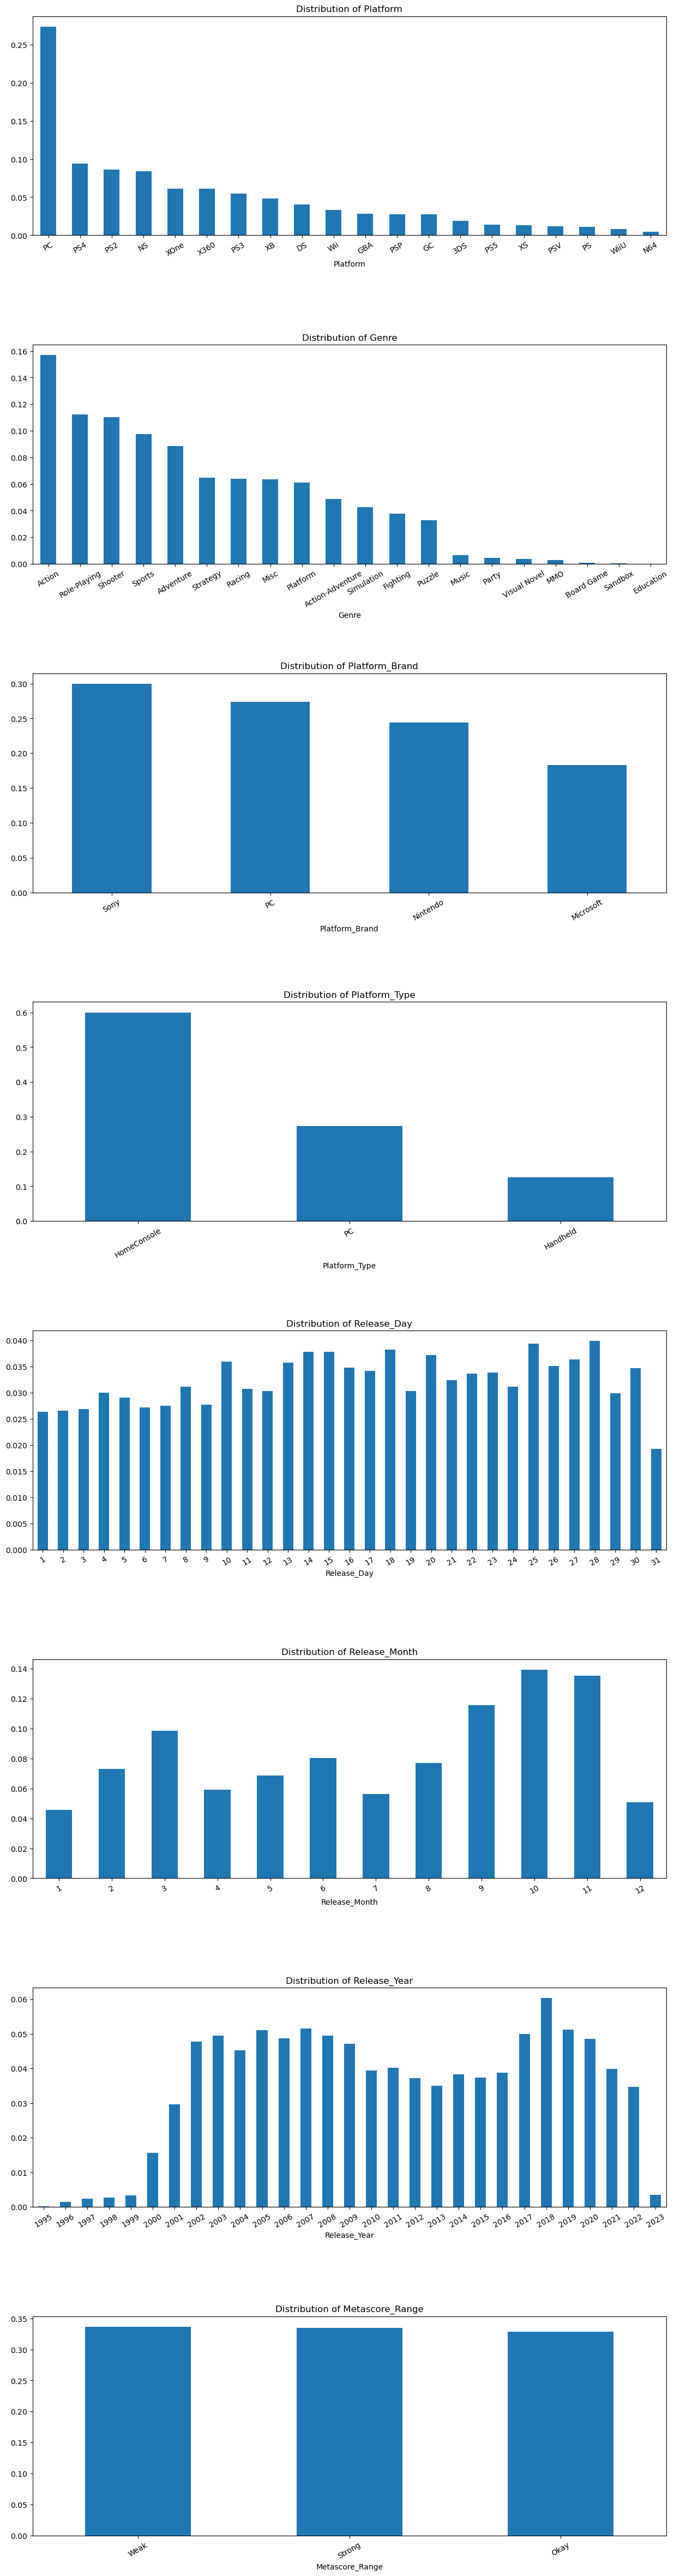

In [178]:
plt.subplots(8,1, figsize=(15,60))

pos = 1

for col in clean_df:

    if clean_df[col].nunique() < 50:
        plt.subplot(8,1, pos)
        if (col == 'Release_Day') or (col == 'Release_Year') or (col == 'Release_Month'):
            sorted_data = clean_df[col].value_counts(normalize=True).sort_index()

            sorted_data.plot(kind="bar")

        else:
            clean_df[col].value_counts(normalize=True).plot(kind="bar")
        pos += 1
        plt.xticks(rotation=30)
        plt.title(f"Distribution of {col}")
        
        
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)


plt.show()

For the other columns, there is too much data to be able to plot it.
I will use a type of vectorizingfor those columns.

Here's what I know for now, based on the visualizations above:

- Most common platform is PC, following by PS2, PS4 and X360.
    - I don't know how much the "platform" will help the model. Considering that I want the model to predict the ratings of future games, I doubt those platforms will be relevant.
- Most common genres are action, shooters and role-playing games.
    - Again, I know that games in those genres can range from really bad to really good, so i'm wondering if the model can find some connections between the genres and the platform brand/type and find coefficients.
- The number of rows for each platform brand is somewhat similar, 30-25-25-20.
- The number of rows of each platform type is a little different. Almost 60% is home console, while PC is around 22% and handheld is around 18%.
- The release day is pretty similar throughout the months.
- There seems to be a lot of games coming out in October and November, but very few games coming out in December and January.
- Since 2002, the number of game releases per year seems to be relatively similar. The fact that there are less games out in 2022, and no 2023 and 2024 games is due to the dataset being only until 2022.




<div id="heading--2-5"/>

## 2.5 - Visualization of target column in each value of each category

For the next graphs, I want to do the same categories, but with the number of weak/okay/strong games in each category.

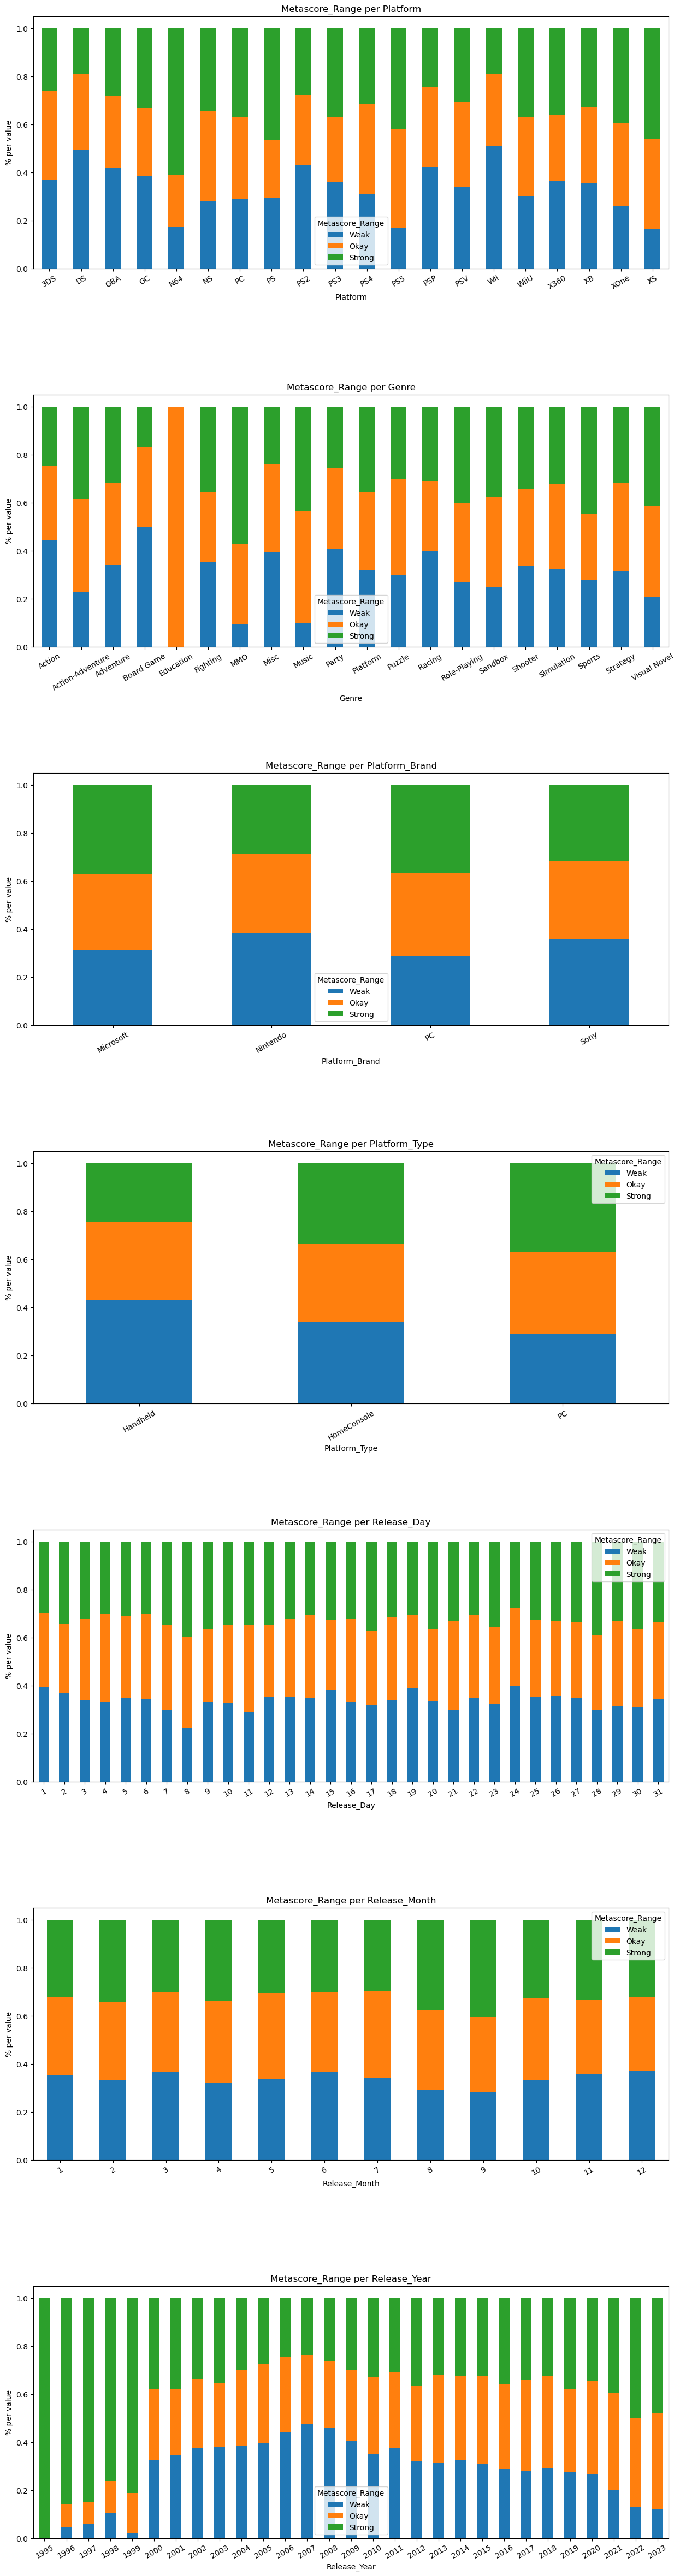

In [179]:

fig, axes = plt.subplots(7, 1, figsize=(15, 60))

pos = 0

# Iterate over each column in clean_df
for col in clean_df:
    if (clean_df[col].nunique() < 50) and (col != 'Metascore_Range'):
        
        # Group the data by the current column and 'another_column' and get counts
        grouped = clean_df.groupby([col, 'Metascore_Range']).size().unstack(fill_value=0)
        
        # Normalize each group to get the proportions
        normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
        
        # Plot the stacked bar chart
        normalized_grouped.plot(kind='bar', stacked=True, ax=axes[pos], rot=30)
        
        # Set title and labels
        axes[pos].set_title(f'Metascore_Range per {col}')
        axes[pos].set_ylabel('% per value')
        axes[pos].set_xlabel(col, )
        
        pos += 1

plt.subplots_adjust(hspace=0.5)
# plt.show()


### We can extract some more insights from the histograms above:

### Metascore range per Platform : <br>
- N64 had a lot of Strong-rated games. <br>
- Wii had a lot of Weak-rated games. <br>
- Current platforms, PS5 and Xbox Series, has very few “okay” games. <br>
- For the rest, relatively similar. <br>
<br>

### Metascore range per Genre <br>
- Education: No weak, no strong, only Okay-rated games. But after verification, there is only 1 game in this category. I will drop it, otherwise my model will have problems later when splitting <br> 
- MMO, almost no Weak games and a lot of Strong games. <br>
- Board game, not a lot of strong games, a lot of okay games. <br>
<br>

### Metascore range per Platform_Brand <br>
- I was surprised to see that Nintendo has the biggest ratio of “Okay” games, and the lowest ratio of Strong games. I think it’s because they had a LOT of games on really good selling consoles and a lot of those games were bad. <br>
- For the 3 others, relatively similar results. <br>
<br>

### Metascore range per Platform_Type <br>
- Handheld has more than 40% of okay games, and only 22-23% of strong games. <br>
- PC has the best ratio with around 40% Strong games and around 25% okay games. <br>
- A lot of the time, handheld games are washed out version of bigger games. It easily disappoints people. <br>
<br>


### Metascore range per release_day or release_month <br>
- No observations here, fairly similar each day/month. <br>

### Metascore range per release year <br>
- The curve is similar to the number of games releasing per year. There is some correlation between the amount of games releasing in a year and the ratio of weak games during that year. <br>



In [180]:
# As mentioned above, dropping the only row in Genre: Education

clean_df.drop(clean_df[clean_df['Genre'] == 'Education'].index, inplace=True)

As of right now, I think it is still too early to extract any more insights from this data.

I am satisfied with the current cleaning and database. I will export the csv and then continue in another notebook.

In [181]:
# exporting to csv when needed

clean_df.to_csv('clean_data_2.0.csv')

<div id="heading--3"/>
    
# 3 - Next Steps

The next steps will all be done in another notebook, to be able to start fresh and clean.

Thank you.

### Benjamin Lavoie (benjaminlavoie02@gmail.com)

### CapStone project: Gaming Score Forecasting Model

### Last update: March 15th, 2024 (version 2.1)